# CREDIT RISK ANALYSIS

In this case study we use the exploratory data analytics with the help of data sets provided to find some useful insights based on trends that may help the bank to look on to certain criterias before approving the loan in future.

## Problem Statement:

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter.This EDA is done here to analyse the patterns present in the data which ensure that the applicants capable of repaying the loan are not rejected.

## Business Objectives:

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

### 1. Import the libraries:

In [636]:
#import the warnings

import warnings
warnings.filterwarnings("ignore")


In [637]:
#import the useful libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [638]:
pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

### 2. Import the data:

In [640]:
#read the data set of "application_data" in inp1

inp1=pd.read_csv("/Users/husna/Desktop/application_data .csv")

In [755]:
#read the data set of "previous_application" data" in inp0

inp2=pd.read_csv("/Users/husna/Desktop/previous_application (1).csv")

### 3. Check the structure/Meta data of data:

In [641]:
#check the number of rows and columns in inp1

inp1.shape

(307511, 122)

In [642]:
#Print the head of the data frame inp1

inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [643]:
#check the columns and its datatypes

inp1.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [644]:
# summary of the data inp1

inp1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

###  4.Fixing the Rows and Columns:

In [645]:
#changing negative ages to positive ages

inp1["DAYS_BIRTH"]=abs(inp1["DAYS_BIRTH"])

In [646]:
inp1["DAYS_BIRTH"].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [647]:
#changing negative days employed to positive 

inp1["DAYS_EMPLOYED"]=abs(inp1["DAYS_EMPLOYED"])

In [648]:
inp1["DAYS_EMPLOYED"].describe()

count    307511.000000
mean      67724.742149
std      139443.751806
min           0.000000
25%         933.000000
50%        2219.000000
75%        5707.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

### 5. Missing values treatment:

In [649]:
# Checking the percentage for missing values in the columns

(100*inp1.isnull().sum()/inp1.shape[0]).sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

#### Handling the missing values:

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These mentioned problems are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column


**Imputation on categorical/numeric columns:**

- For numerical variables use mean and median
- For categorical variables use mode

In [650]:
# Dropping the columns with higher percentage of missing values 
temp=(100*inp1.isnull().sum()/inp1.shape[0]).sort_values(ascending=False).reset_index().rename(columns={"index":"column_name",0:"% missing"})

In [651]:
temp

,column_name,% missing
0,COMMONAREA_MEDI,69.872297
1,COMMONAREA_AVG,69.872297
2,COMMONAREA_MODE,69.872297
3,NONLIVINGAPARTMENTS_MODE,69.432963
4,NONLIVINGAPARTMENTS_AVG,69.432963
5,NONLIVINGAPARTMENTS_MEDI,69.432963
6,FONDKAPREMONT_MODE,68.386172
7,LIVINGAPARTMENTS_MODE,68.354953
8,LIVINGAPARTMENTS_AVG,68.354953
9,LIVINGAPARTMENTS_MEDI,68.354953


**There are columns with missing values more than 40%.So, there is no way one can replace these missing data. So, we will drop these columns by removing it.**

In [652]:
#columns with missing value percentage 40 equal and above are dropped

drop_column=list(temp[temp["% missing"]>=40]["column_name"])

In [653]:
inp1.drop(drop_column,axis=1,inplace=True)

In [654]:
#check the shape of inp1 to confirm the columns are dropped

inp1.shape

(307511, 73)

In [655]:
inp1

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,9327,236,-8456.0,-1982,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,Services,0.681632,NaN,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,20775,365243,-4388.0,-4090,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,XNA,0.115992,NaN,0

**There are also few columns which may not be necessary for understanding the pattern.So dropping that columns also as part of data cleaning**

In [656]:
#drop the columns which are not important for the analysis
inp1.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'], axis=1, inplace=True)

In [657]:
(100*inp1.isnull().sum()/inp1.shape[0]).sort_values(ascending=False)

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REGION_RATING_CLIENT            0.000000
LIVE_REGION_NOT_WORK_REGION     0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_L

In [658]:
inp1.shape

(307511, 53)

**There are few more columns having 31%,19% and 13% of missing values. The different approach to deal these missing values are either deleting or retaining it(impute or deleting the rows).**

**Lets check if any any of these approaches are possible here.**

In [659]:
# treating missing value for OCCUPATION_TYPE

inp1["OCCUPATION_TYPE"].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [660]:
inp1["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [661]:
inp1["OCCUPATION_TYPE"].mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

**As we cannot fill 31% missing values with laborers, we will leave it as it i.e. untreated.**

In [662]:
# treating missing value for EXT_SOURCE_3
    
inp1['EXT_SOURCE_3'].head(10)

0    0.139376
1         NaN
2    0.729567
3         NaN
4         NaN
5    0.621226
6    0.492060
7    0.540654
8    0.751724
9         NaN
Name: EXT_SOURCE_3, dtype: float64

In [663]:
#summary of 'EXT_SOURCE_3'

inp1['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

**Here the percentage of missing value is 19%.It is not recommended to drop the missing values as it may result in a significant loss of information.In this case, we can use the median as the measure of central tendency since it is less sensitive to outliers compared to the mean**

In [664]:
#treating missing value for AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR

inp1['AMT_REQ_CREDIT_BUREAU_YEAR'].head()

0    1.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [665]:
inp1['AMT_REQ_CREDIT_BUREAU_QRT'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [666]:
inp1['AMT_REQ_CREDIT_BUREAU_MON'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [667]:
inp1['AMT_REQ_CREDIT_BUREAU_WEEK'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [668]:
inp1['AMT_REQ_CREDIT_BUREAU_DAY'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [669]:
inp1['AMT_REQ_CREDIT_BUREAU_HOUR'].head()

0    0.0
1    0.0
2    0.0
3    NaN
4    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

**As all these column only takes discrete values, 1 or 0, so we cannot replace it by mean value. So we can replace by mode.**

In [670]:
# treatment of missing values for the columns with missing value percentage less than 1%

**Since the percentage of missing values is less than 1%,it will not effect the analysis as musch. Hence left untreated.**

### 6. Handling Outliers:

Outliers are values that are much beyond or far from the next nearest data points.

**Major approaches to the treatment of outliers can include:**

- Imputation

- Deletion of outliers

- Binning of values

- Capping the outliers



In [671]:
inp1.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [672]:
# summary of the AMT_INCOME_TOTAL

inp1['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

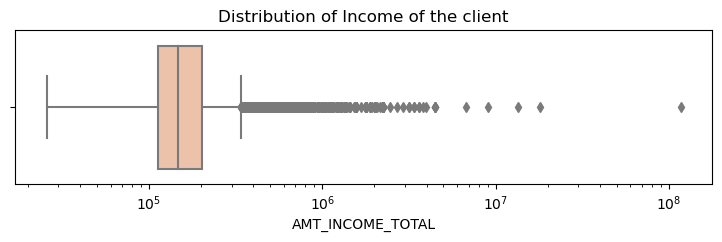

In [673]:
# plot the box plot for AMT_INCOME_TOTAL

plt.figure(figsize=(9,2))
sns.boxplot(inp1['AMT_INCOME_TOTAL'])
plt.xscale('log')
plt.title("Distribution of Income of the client")
plt.show()

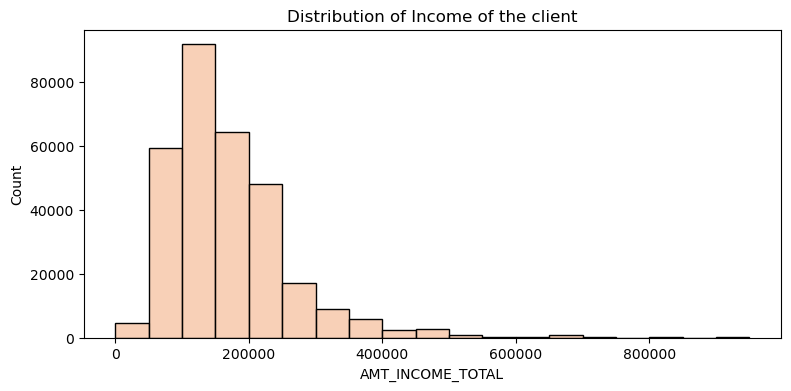

In [674]:
# plot the histogram for AMT_INCOME_TOTAL

plt.figure(figsize=(9,4))
bins=[i for i in range(0,1000000,50000)]
sns.histplot(inp1['AMT_INCOME_TOTAL'],bins=bins)
plt.title("Distribution of Income of the client")
plt.show()

In [675]:
# find the quantiles of AMT_INCOME_TOTAL

inp1['AMT_INCOME_TOTAL'].quantile([0.5,0.75,0.95,0.99])

0.50    147150.0
0.75    202500.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

**Quantile will give us good idea of outliers.Few outliers are present in AMT_INCOME_TOTAL as the total income vary from person to person.**

**Here we can opt the approach of capping the outliers.**


In [676]:
### summary of  AMT_ANNUITY

inp1['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

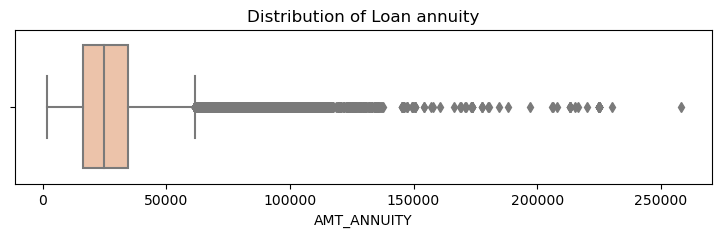

In [677]:
# plot the box plot for AMT_ANNUITY

plt.figure(figsize=(9,2))
sns.boxplot(inp1['AMT_ANNUITY'])
plt.title("Distribution of Loan annuity")
plt.show()

**As you can see outlier after 250000 and also there is no much difference between mean and median here, we can go for an approach of imputing it with the median**

In [679]:
### summary of AMT_CREDIT

In [680]:
inp1['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

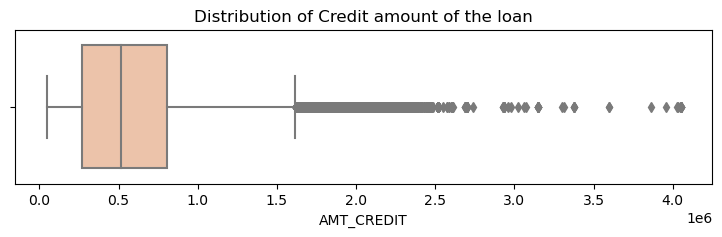

In [681]:
# plot the box plot for AMT_CREDIT

plt.figure(figsize=(9,2))
sns.boxplot(inp1['AMT_CREDIT'])
plt.title("Distribution of Credit amount of the loan")
plt.show()

**There is no much difference between mean and median here and also the amount credit approved varies from person to person**

In [682]:
### summary of AMT_GOODS_PRICE

inp1['AMT_GOODS_PRICE'].describe()


count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [683]:
#check the quantile

inp1['AMT_GOODS_PRICE'].quantile([0.5,0.75,0.95,0.99])

0.50     450000.0
0.75     679500.0
0.95    1305000.0
0.99    1800000.0
Name: AMT_GOODS_PRICE, dtype: float64

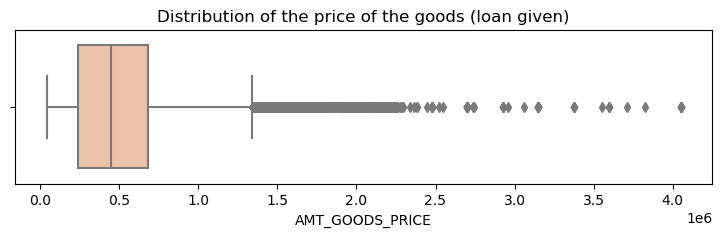

In [684]:
# plot the box plot for AMT_GOODS_PRICE

plt.figure(figsize=(9,2))
sns.boxplot(inp1['AMT_GOODS_PRICE'])
plt.title("Distribution of the price of the goods (loan given)")
plt.show()

**It appears that this variable has a wide range of values, with the maximum value being more than 4 times larger than the 99th percentile. This suggests the presence of potential outliers in the dataset.**

**A method IQR method or  limiting the impact of outliers by replacing extreme values with the nearest values that are within a specified range can be done here**

### 7.Binning continues variable

In [685]:
# binning the DAYS_BIRTH

In [686]:
inp1['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

In [687]:
#creating bins for date of birth

bins=[0,7300,10950,14600,18250,21900,25550]
ranges=['0-20','20-30','30-40','40-50','50-60','60-70']
inp1['AGE_RANGE']=pd.cut(inp1['DAYS_BIRTH'],bins,labels=ranges)

In [688]:
# binning the AMT_INCOME_TOTAL

inp1['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [689]:
# find the quantile

inp1['AMT_INCOME_TOTAL'].quantile([0.5,0.7,0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [690]:
# binning the annual income

bins=[0,200000,400000,1000000000]
ranges=['Low','Medium','High']
inp1['INCOME_RANGE']=pd.cut(inp1['AMT_INCOME_TOTAL'],bins,labels=ranges)

In [691]:
inp1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_RANGE,INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,20-30,Medium
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,50-60,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Low


**Binning helps to understand the distribution of data and also helps to simplify data**

### 8. Univariate Analysis

In [692]:
#to understand the nature of gender for applicants

In [693]:
inp1["CODE_GENDER"].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

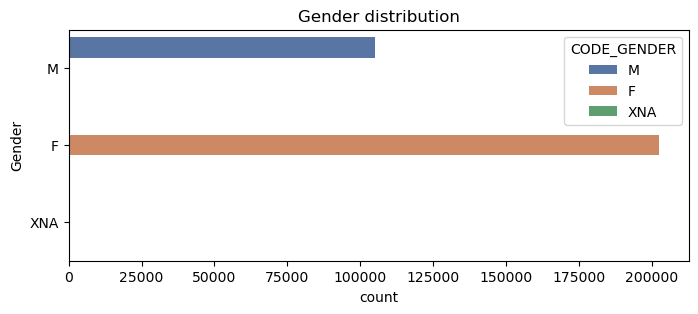

In [694]:
plt.figure(figsize=(8,3))
sns.countplot(y='CODE_GENDER', hue='CODE_GENDER', data=inp1, palette="deep")
plt.title("Gender distribution")
plt.ylabel("Gender")
plt.show()

**Insight:**

**More females clients compared to male clients.**

In [695]:
#to understand the type of income of applicants

inp1['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

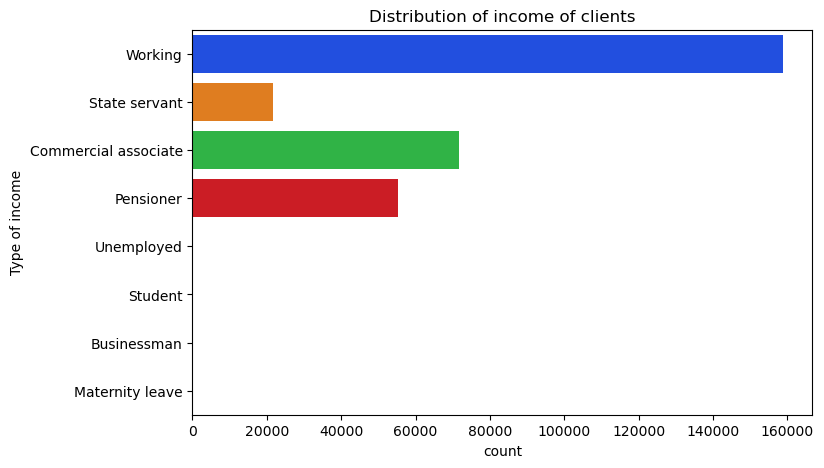

In [696]:
plt.figure(figsize=(8,5))
sns.countplot(y='NAME_INCOME_TYPE', hue=None, data=inp1,palette="bright")
plt.title("Distribution of income of clients")
plt.ylabel("Type of income")
plt.show()

**Insight:**

**More working group has applied for loan rather compared to bussinessman and students**

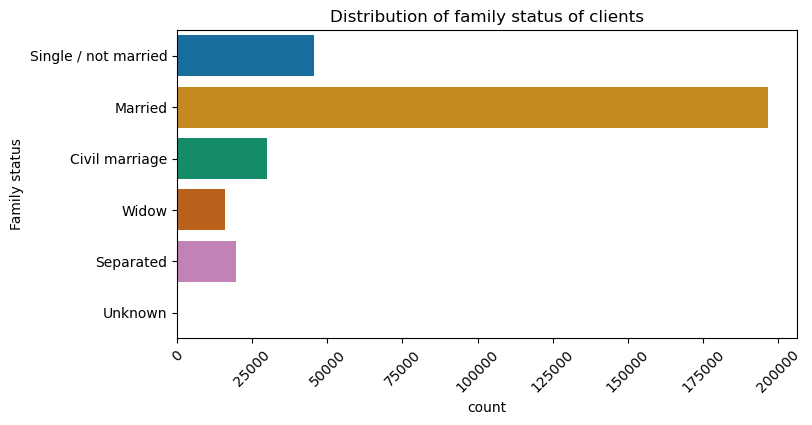

In [697]:
#to understand the family status of applicants

plt.figure(figsize=(8,4))
sns.countplot(y='NAME_FAMILY_STATUS', hue=None, data=inp1,palette="colorblind")
plt.title("Distribution of family status of clients")
plt.ylabel("Family status")
plt.xticks(rotation=45)
plt.show()

**Insight:**

**More married clients compared to widows**

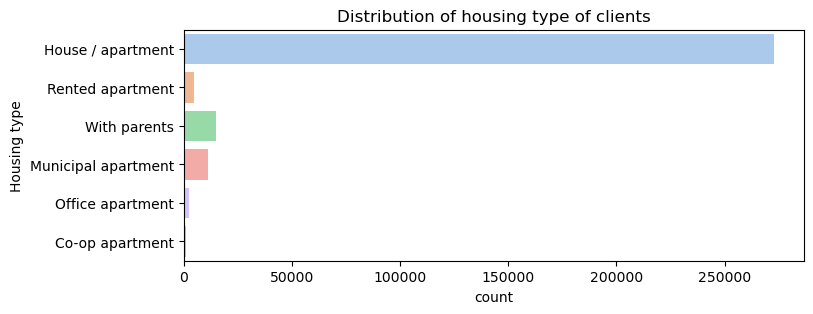

In [698]:
#to understand the housing type of applicants

plt.figure(figsize=(8,3))
sns.countplot(y='NAME_HOUSING_TYPE', hue=None, data=inp1,palette="pastel")
plt.title("Distribution of housing type of clients")
plt.ylabel("Housing type")
plt.show()

**Insight:**

**Applicants living in house/appartment are more applied for loan compared to other category**

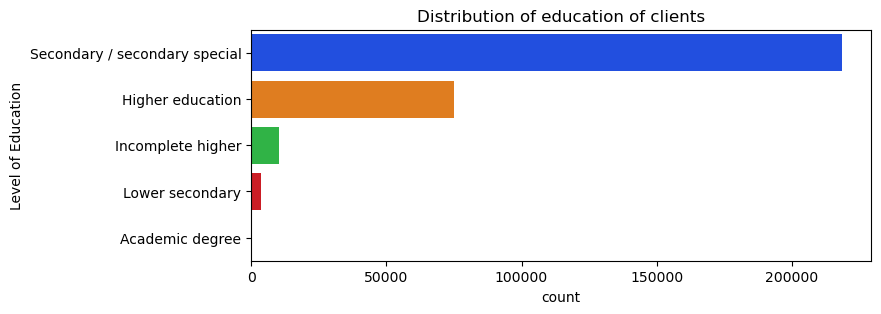

In [699]:
#to understand the education of applicants

plt.figure(figsize=(8,3))
sns.countplot(y='NAME_EDUCATION_TYPE', hue=None, data=inp1,palette="bright")
plt.title("Distribution of education of clients")
plt.ylabel("Level of Education")
plt.show()

**Insight:**

**More applicants are of education level Secondary/Secondary special  among the clients while Acdemic degree holders applied least**

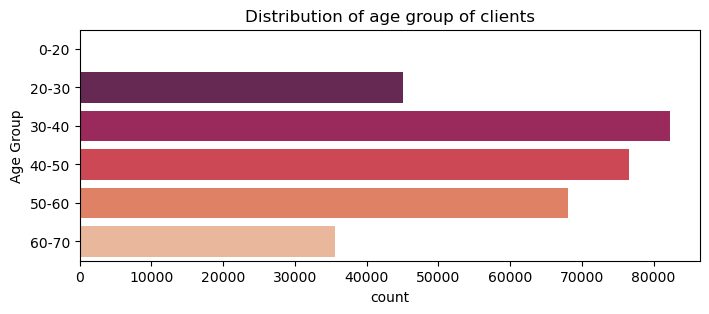

In [700]:
#to understand the age range of applicants

plt.figure(figsize=(8,3))
sns.countplot(y='AGE_RANGE', hue=None, data=inp1,palette="rocket")
plt.title("Distribution of age group of clients")
plt.ylabel("Age Group")
plt.show()

**Insight:**

**More applicants comes under the age group (30-40)years and least applied group are of range (60-70)years**

### 9. Data Imbalance

In [701]:
# find the data imbalance of the target variable

100*inp1['TARGET'].value_counts(normalize=True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64


**Here from the data imbalnce calculation, it is understood that 8.07% of 1's have payment difficulty and 91.92% have no difficulty in payment**



### 10.  Segmented Univariate analysis

In [702]:
# create a dataframe df_0 (no difficulty),for segmented univariate analysis 
df_0=inp1[inp1["TARGET"]==0]

In [703]:
# create a dataframe df_1 (client with payment difficulties),for segmented univariate analysis 

df_1=inp1[inp1["TARGET"]==1]

In [704]:
#dataframe with no diificulty in payment

df_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_RANGE,INCOME_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,40-50,Medium
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Low
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,50-60,Low
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,50-60,Low
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,-4970.0,-477,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0,40-50,Low


In [705]:
df_0.shape

(282686, 55)

In [706]:
df_0.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,282686.000000,282686.0,282686.000000,2.826860e+05,2.826860e+05,282674.000000,2.824290e+05,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282684.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,282686.000000,2.820780e+05,227398.000000,281701.000000,281701.000000,281701.000000,281701.000000,282685.000000,245459.000000,245459.000000,245459.000000,245459.000000,245459.000000,245459.000000
mean,278244.744536,0.0,0.412946,1.690777e+05,6.026483e+05,27163.623349,5.427368e+05,0.021021,16138.176397,69668.812255,-5029.941065,-3017.219788,0.999996,0.814653,0.195991,0.998129,0.284238,0.056840,2.150154,2.043578,2.022449,12.086807,0.014942,0.050317,0.040494,0.074641,0.224090,0.175856,5.234787e-01,0.520969,1.415742,0.139148,1.398923,0.096688,-976.388294,0.006380,0.006914,0.034315,0.270697,0.265939,1.889199
std,102825.776954,0.0,0.718843,1.104763e+05,4.068459e+05,14658.307178,3.737855e+05,0.013978,4364.200856,140983.356991,3538.464478,1506.614090,0.001881,0.388579,0.396963,0.043219,0.451051,0.231538,0.906984,0.508422,0.501971,3.263173,0.121323,0.218599,0.197114,0.262812,0.416982,0.380698,1.862767e-01,0.190465,2.402858,0.439768,2.381793,0.355771,831.210739,0.083759,0.111091,0.204747,0.928799,0.805355,1.863376
min,100003.000000,0.0,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189103.250000,0.0,0.000000,1.125000e+05,2.700000e+05,16456.500000,2.385000e+05,0.010006,12536.000000,967.000000,-7550.000000,-4313.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.097866e-01,0.385915,0.000000,0.000000,0.000000,0.000000,-1586.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278362.500000,0.0,0.000000,1.485000e+05,5.177880e+05,24876.000000,4.500000e+05,0.018850,15877.000000,2304.000000,-4544.000000,-3295.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.739047e-01,0.546023,0.000000,0.000000,0.000000,0.000000,-776.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367241.500000,0.0,1.000000,2.025000e+05,8.100000e+05,34749.000000,6.885000e+05,0.028663,19793.750000,6074.000000,-2045.000000,-1755.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.677051e-01,0.673830,2.000000,0.000000,2.000000,0.000000,-281.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,0.0,19.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,0.000000,0.000000,1.000000,1.000000,1

In [707]:
##dataframe with dificulty in payment

df_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_RANGE,INCOME_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,20-30,Medium
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,-6573.0,-1827,1,1,0,1,0,0,Cooking staff,1.0,3,2,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.548477,0.190706,10.0,1.0,10.0,0.0,-161.0,0.0,0.0,0.0,0.0,2.0,2.0,50-60,Low
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,855000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,-1182.0,-1029,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,0.306841,0.320163,0.0,0.0,0.0,0.0,-1075.0,0.0,0.0,0.0,2.0,0.0,4.0,40-50,Medium
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,238500.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,-45.0,-4409,1,1,1,1,1,0,Sales staff,2.0,3,3,THURSDAY,11,0,0,0,0,0,0,Self-employed,0.674203,0.399676,1.0,0.0,1.0,0.0,-1480.0,0.0,0.0,0.0,0.0,0.0,2.0,30-40,Low
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,252000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.028663,24794,365243,-5391.0,-4199,1,0,0,1,0,0,NaN,2.0,2,2,THURSDAY,10,0,0,0,0,0,0,XNA,0.023952,0.720944,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60-70,Low


In [708]:
df_1.shape

(24825, 55)

In [709]:
df_1.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,24825.000000,24825.0,24825.000000,2.482500e+04,2.482500e+04,24825.000000,2.480400e+04,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.0,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.000000,24825.00000,24825.000000,24773.000000,19148.000000,24789.000000,24789.000000,24789.000000,24789.000000,24825.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000,20533.000000
mean,277449.167936,1.0,0.463807,1.656118e+05,5.577785e+05,26481.744290,4.889724e+05,0.019131,14884.828077,45587.324149,-4487.127009,-2732.099617,1.0,0.879517,0.237825,0.998187,0.244955,0.055347,2.181269,2.153635,2.134824,11.797100,0.017442,0.055911,0.042538,0.118389,0.30292,0.221672,0.410935,0.390717,1.496147,0.191980,1.477672,0.138247,-808.796818,0.006672,0.008036,0.034919,0.227926,0.259923,2.028783
std,102383.123458,0.0,0.756903,7.466770e+05,3.464332e+05,12450.676999,3.116365e+05,0.011905,4192.844583,118303.300421,3299.650241,1516.975313,0.0,0.325532,0.425760,0.042538,0.430069,0.228662,0.951327,0.505052,0.499909,3.284299,0.130914,0.229755,0.201817,0.323074,0.45953,0.415380,0.213107,0.205810,2.378438,0.516524,2.355908,0.427645,758.090713,0.084926,0.106682,0.203941,0.745116,0.643789,1.934063
min,100002.000000,1.0,0.000000,2.565000e+04,4.500000e+04,2722.500000,4.500000e+04,0.000533,7678.000000,0.000000,-22928.000000,-6207.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000005,0.000527,0.000000,0.000000,0.000000,0.000000,-4070.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189555.000000,1.0,0.000000,1.125000e+05,2.844000e+05,17361.000000,2.385000e+05,0.009630,11396.000000,677.000000,-6646.000000,-4119.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.238568,0.223831,0.000000,0.000000,0.000000,0.000000,-1301.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,276291.000000,1.0,0.000000,1.350000e+05,4.975200e+05,25263.000000,4.500000e+05,0.018634,14282.000000,1458.000000,-4056.000000,-2797.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.440381,0.379100,0.000000,0.000000,0.000000,0.000000,-594.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,366050.000000,1.0,1.000000,2.025000e+05,7.333155e+05,32976.000000,6.750000e+05,0.025164,18037.000000,3280.000000,-1671.000000,-1392.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,2.000000,14.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.594190,0.553165,2.000000,0.000000,2.000000,0.000000,-194.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456254.000000,1.0,11.000000,1.170000e+08,4.027680e+06,149211.000000,3.600000e+06,0.072508,25168.000000,365243.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,3.000000,3.000000,23.000000,1.000000,1.000000,1.000000,1.000000

**ANALYSIS :**

In [710]:
#NUMERICAL VARIABLE

In [711]:
df_0['INCOME_RANGE'].describe()

count     282686
unique         3
top          Low
freq      201045
Name: INCOME_RANGE, dtype: object

In [712]:
df_1['INCOME_RANGE'].describe()

count     24825
unique        3
top         Low
freq      18551
Name: INCOME_RANGE, dtype: object

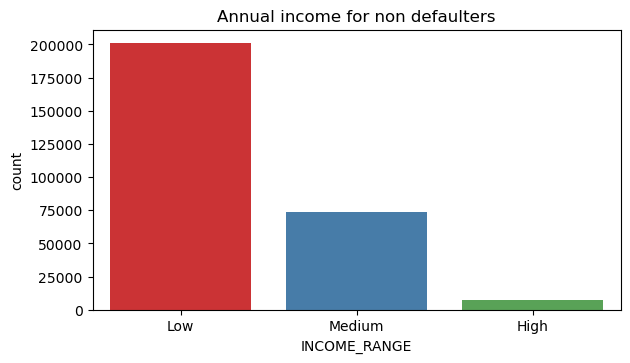

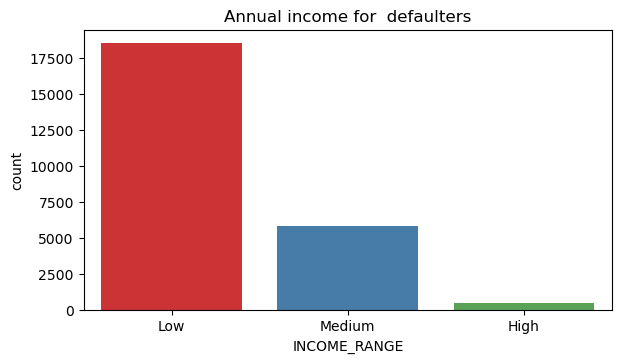

In [713]:
#plot a subplots for df_0 and df_1 for income range of clients

#subplot 1

plt.figure(figsize=(15,8))
plt.subplot(2,2,1)


plt.title('Annual income for non defaulters')
sns.countplot(df_0['INCOME_RANGE'],palette="Set1")
plt.show()

#subplot 2
plt.figure(figsize=(15,8))
plt.subplot(2,2,2)


plt.title('Annual income for  defaulters')
sns.countplot(df_1['INCOME_RANGE'],palette="Set1")
plt.show()

**Insight:**

**Both shows a similiar trend where in both non defaulters and defaulters, the low income group has higher count**

In [714]:
# find the quantile of amount of credit

inp1['AMT_CREDIT'].quantile([0.5,0.7,0.9,0.95,0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

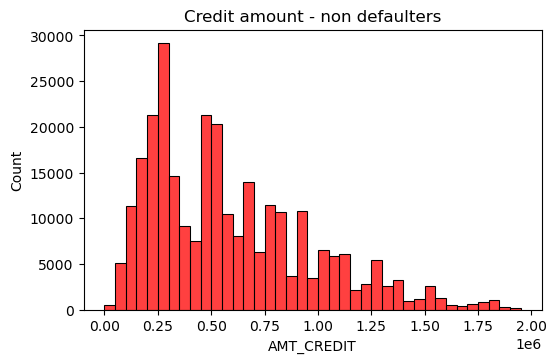

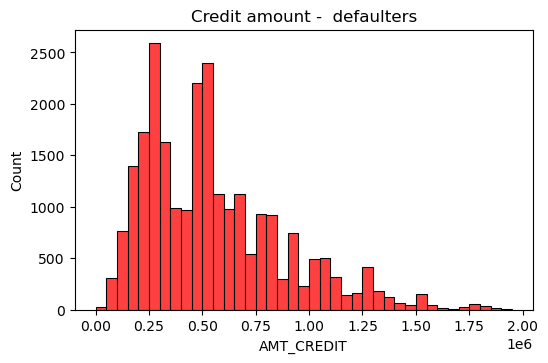

In [715]:
#plot a subplots for df_0 and df_1 for credit amount of the loan

#subplot 1

plt.figure(figsize=(13,8))
plt.subplot(2,2,1)

plt.title('Credit amount - non defaulters')
bins=[i for i in range(0,2000000,50000)]
sns.histplot(df_0['AMT_CREDIT'],bins=bins,color='red')
plt.show()

#subplot 2
plt.figure(figsize=(13,8))
plt.subplot(2,2,2)

plt.title('Credit amount -  defaulters')
bins=[i for i in range(0,2000000,50000)]
sns.histplot(df_1['AMT_CREDIT'],bins=bins,color='red')
plt.show()

**Insight:**

**We can see clients given a credit of 4-4.5 lakhs are more likely not to repay on time those given credit of 11-11.5 lakhs are more likely to repay on time.**

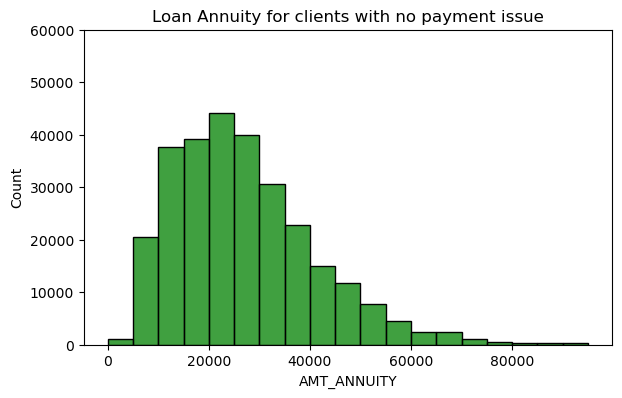

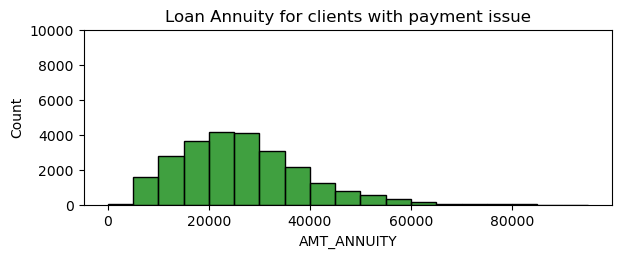

In [1013]:
# plot a subplots for df_0 and df_1 for Loan annuity

#subplot 1

plt.figure(figsize=(15,9))
plt.subplot(2,2,1)
plt.ylim(0,60000)

plt.title('Loan Annuity for clients with no payment issue')
bins=[i for i in range(0,100000,5000)]
sns.histplot(df_0['AMT_ANNUITY'],bins=bins,color='green')
plt.show()

#subplot 2
plt.figure(figsize=(15,5))
plt.subplot(2,2,2)
plt.ylim(0,10000)

plt.title('Loan Annuity for clients with payment issue')
bins=[i for i in range(0,100000,5000)]
sns.histplot(df_1['AMT_ANNUITY'],bins=bins,color='green')
plt.show()

**Insight:**

**The loan annuity of 30000 is finding difficult to pay on time**

In [995]:
#CATEGORICAL VARIABLE

In [718]:
category = list(inp1.select_dtypes(include=['object']).columns)

In [719]:
category

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [996]:
def draw(train, df_0, df_1, col):
    
    
    fig = plt.figure(figsize=(13,10))
    

    ax1 = plt.subplot(221)
    sns.countplot(x= column, hue = 'TARGET', data = train, ax = ax1)
    plt.xticks(rotation=90)
    plt.title('Data visualisation for target in terms of total count')


    ax2 = plt.subplot(222)
    df = pd.DataFrame()
    df['0']= ((df_0[col].value_counts())/len(df_0))
    df['1']= ((df_1[col].value_counts())/len(df_1))
    df.plot.bar(ax=ax2)
    plt.title('Data visualisation for target in terms of percentage')


    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

draw  NAME_CONTRACT_TYPE


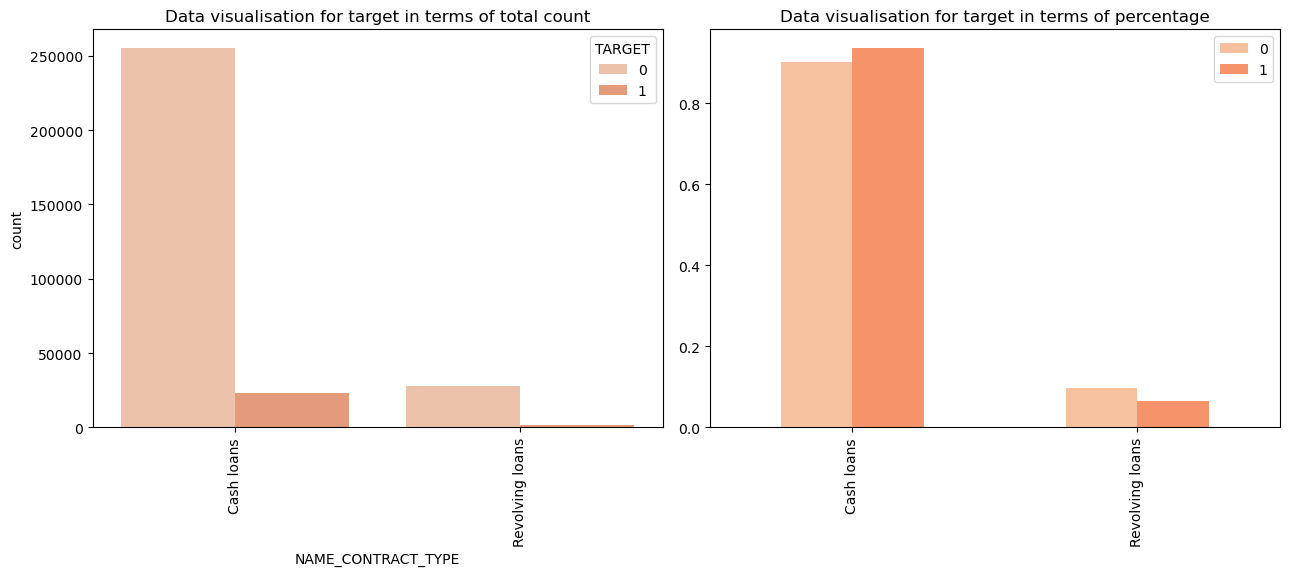

*************************************************************************************************
draw  CODE_GENDER


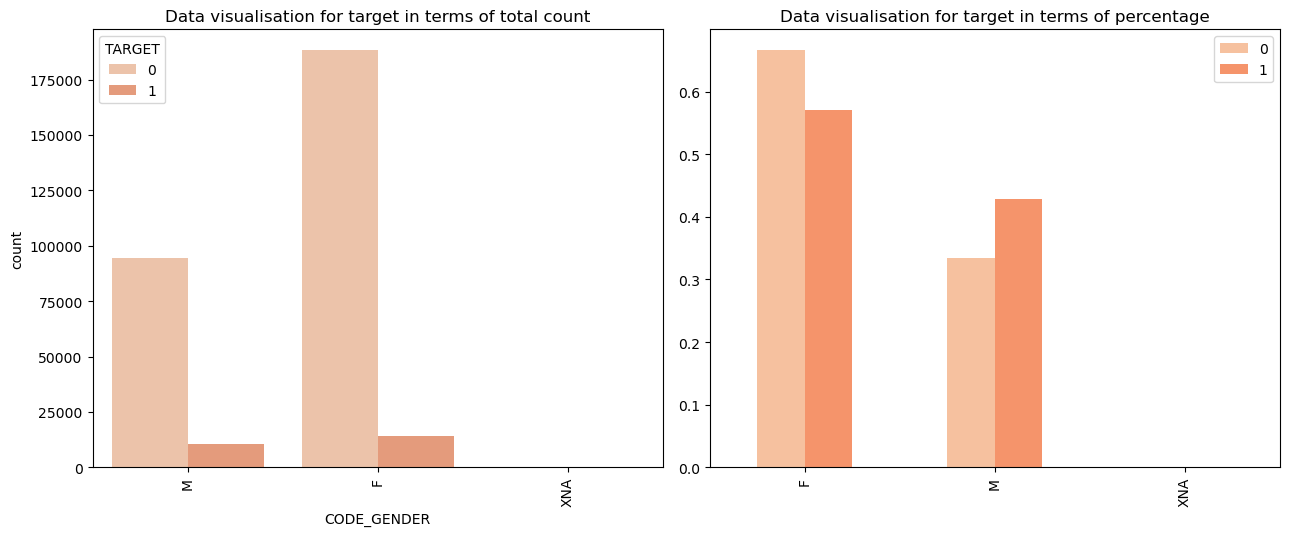

*************************************************************************************************
draw  FLAG_OWN_CAR


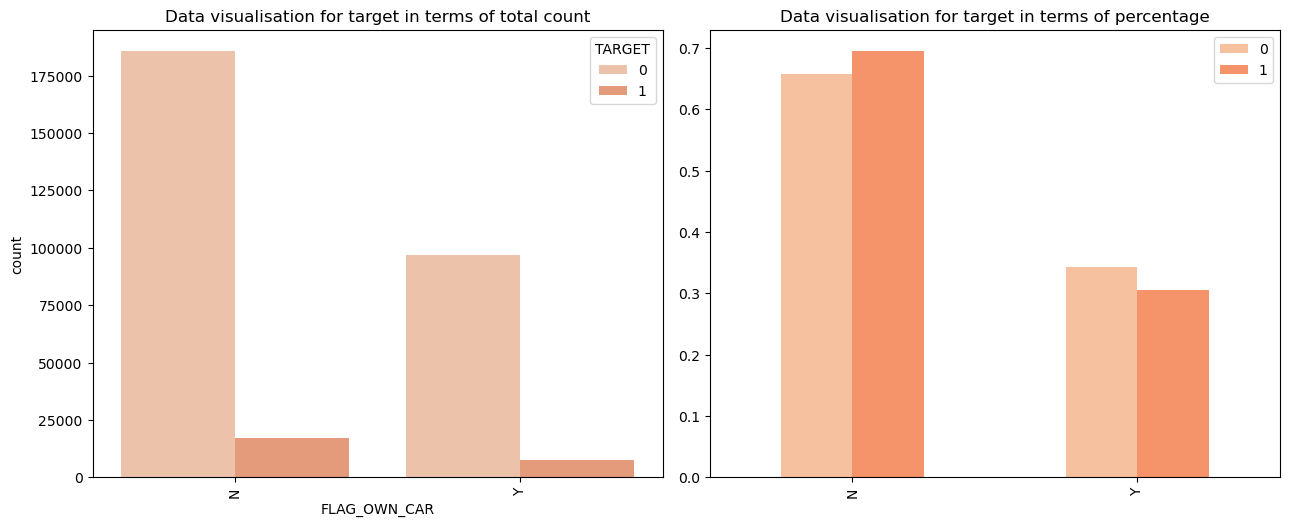

*************************************************************************************************
draw  FLAG_OWN_REALTY


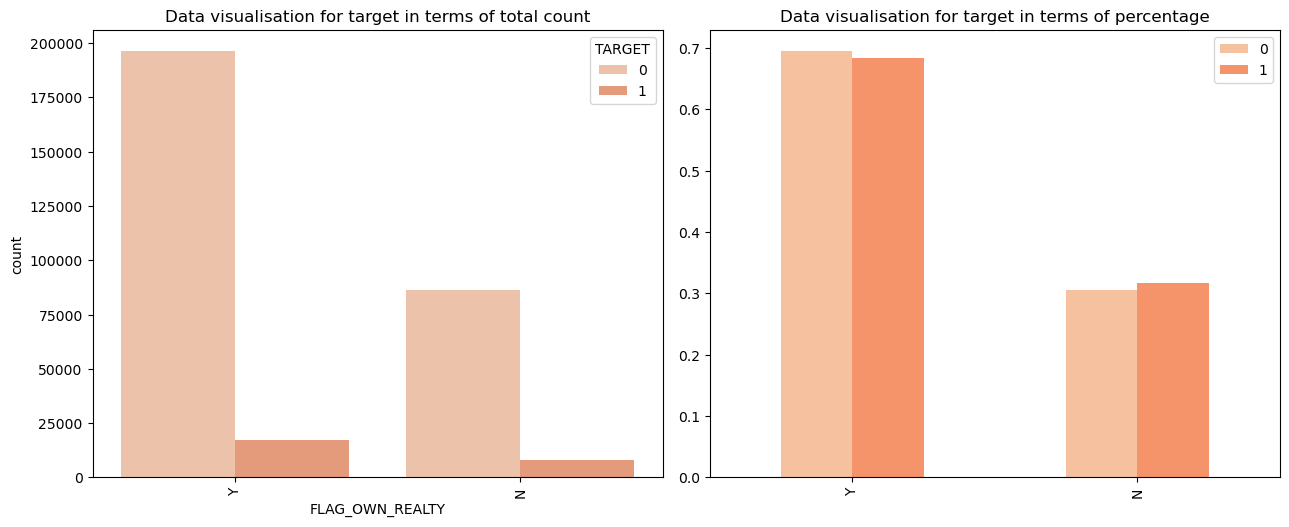

*************************************************************************************************
draw  NAME_TYPE_SUITE


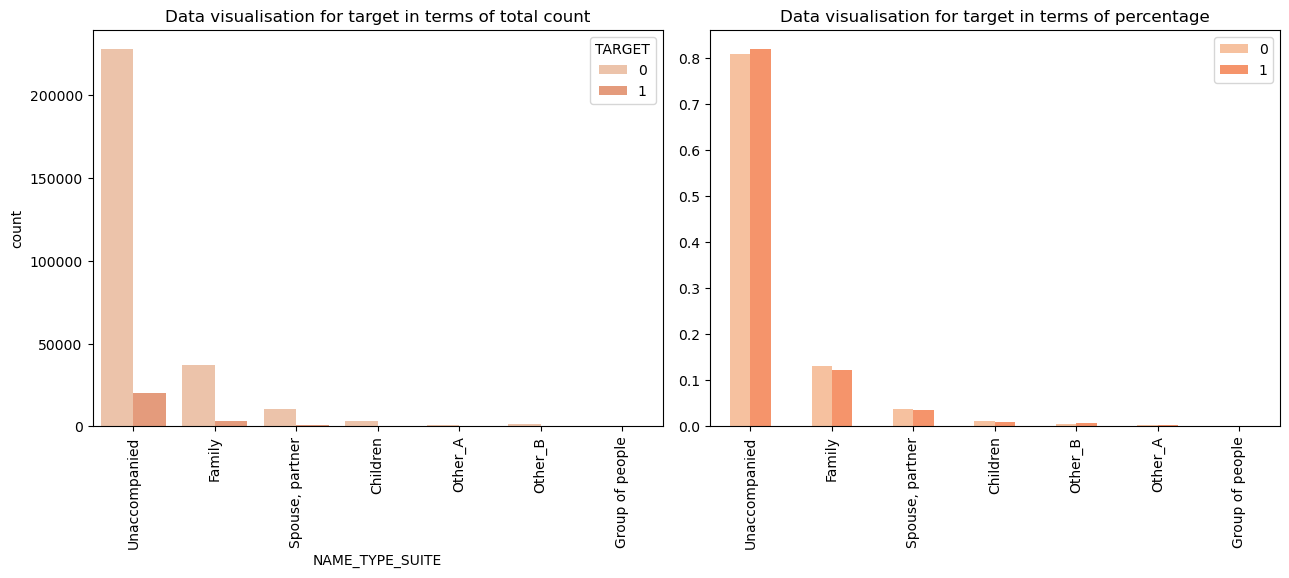

*************************************************************************************************
draw  NAME_INCOME_TYPE


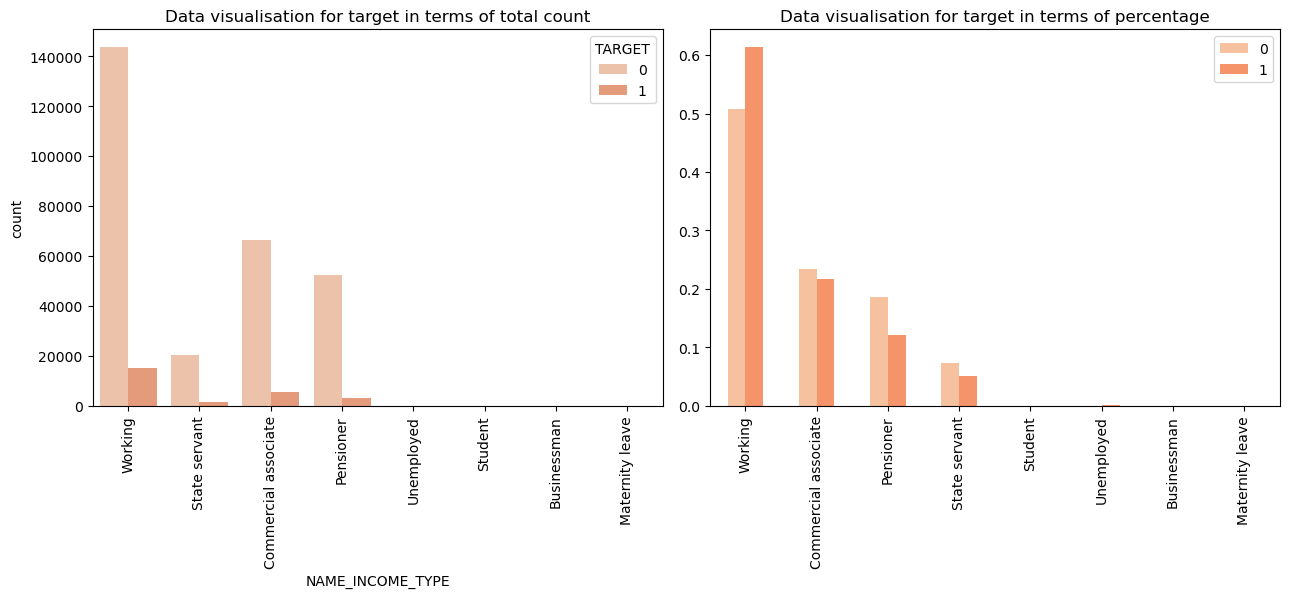

*************************************************************************************************
draw  NAME_EDUCATION_TYPE


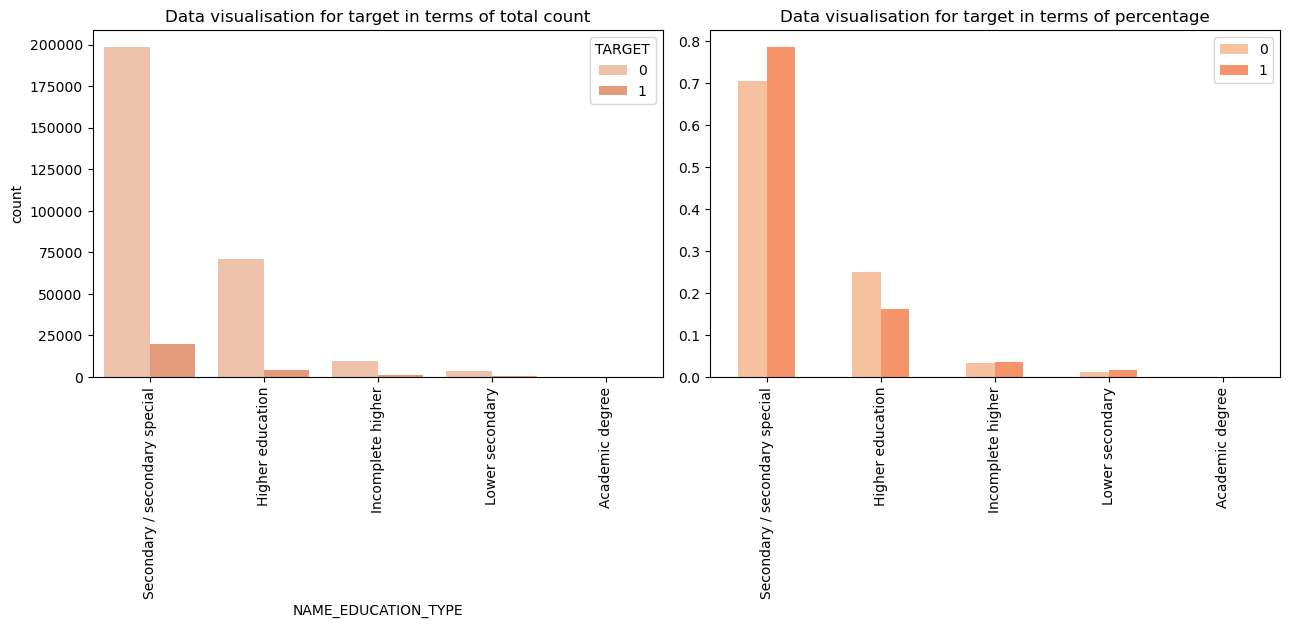

*************************************************************************************************
draw  NAME_FAMILY_STATUS


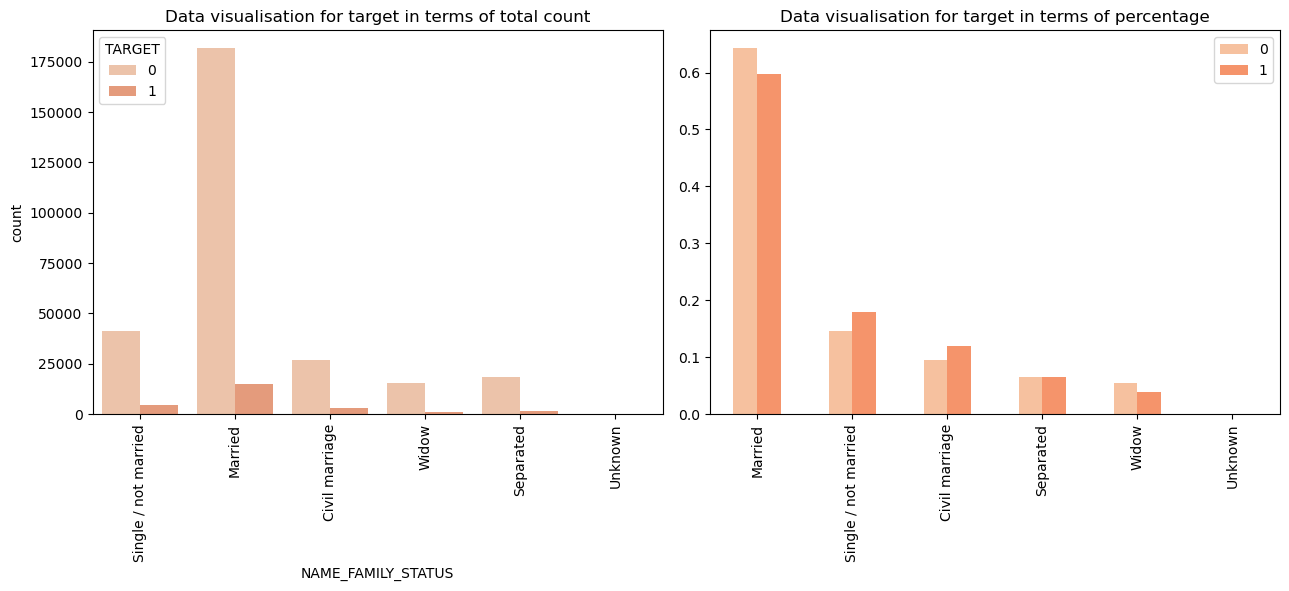

*************************************************************************************************
draw  NAME_HOUSING_TYPE


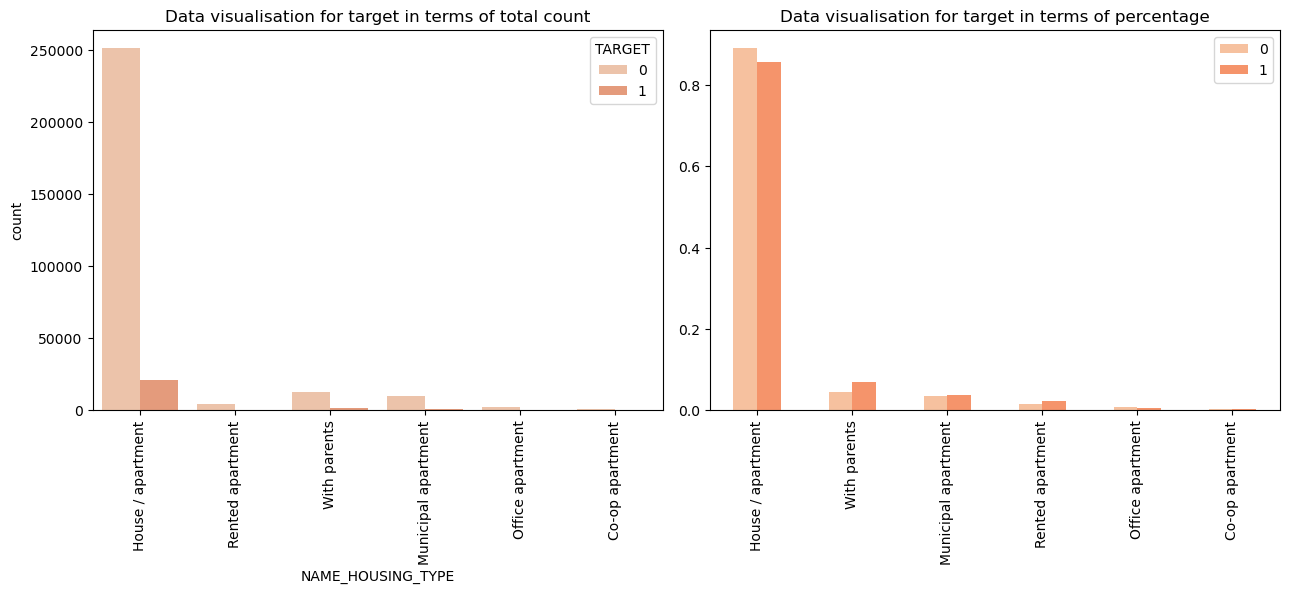

*************************************************************************************************
draw  OCCUPATION_TYPE


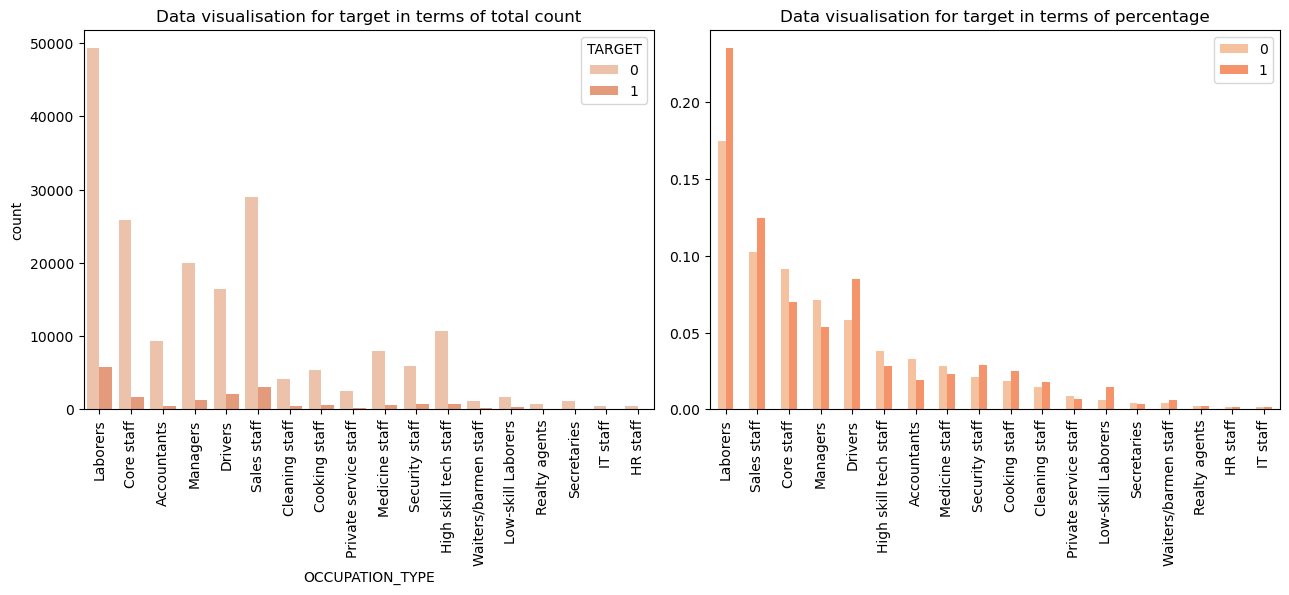

*************************************************************************************************
draw  WEEKDAY_APPR_PROCESS_START


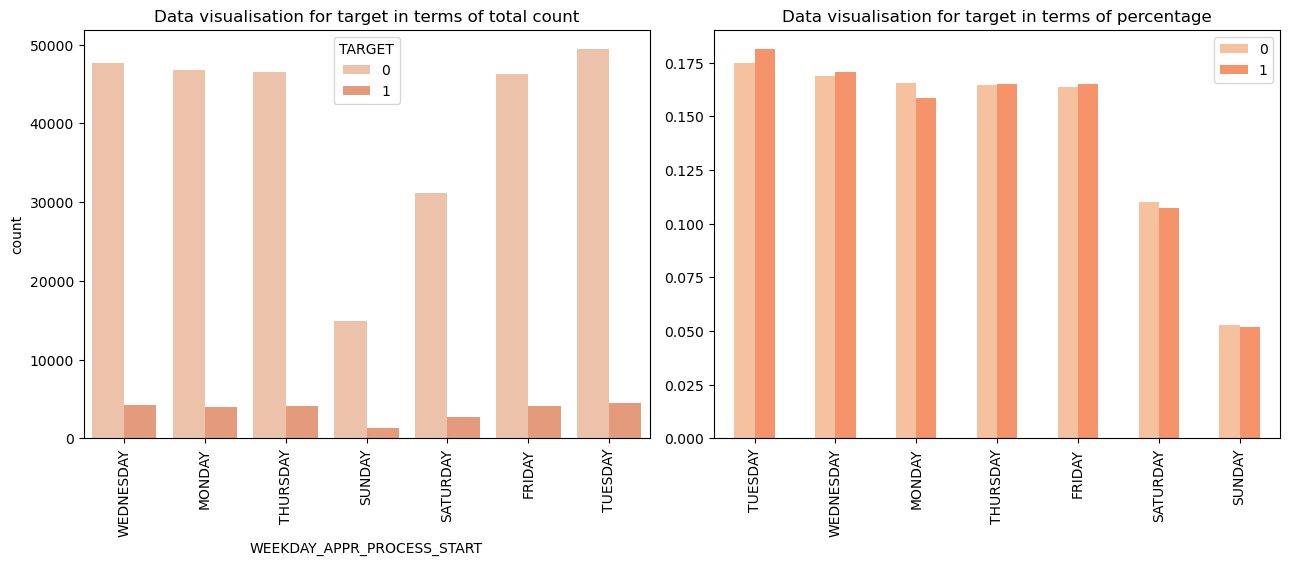

*************************************************************************************************
draw  ORGANIZATION_TYPE


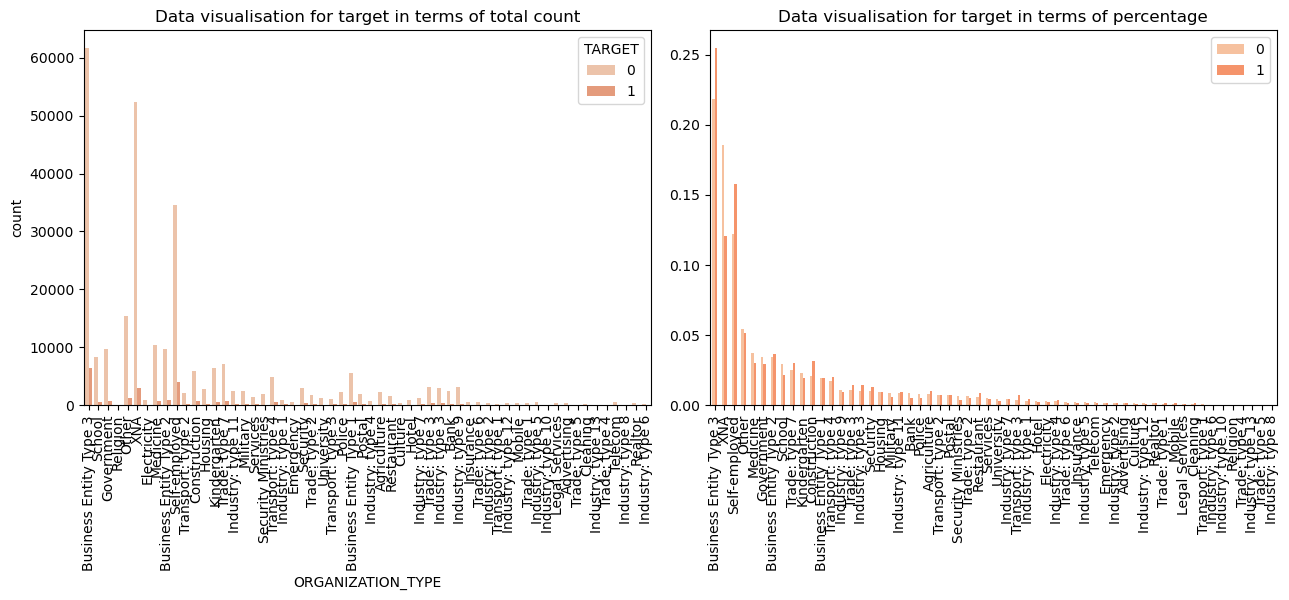

*************************************************************************************************


In [997]:
for column in category:
    print("draw ", column)
    draw(inp1, df_0, df_1, column)
    print('*************************************************************************************************')

**Insights from categorical variable analysis**

-  Cash loans have more defaulters than revolving loans.
-  More male defaulters than female
-  Clients that don't own car find difficult to pay on time.
-  Clients that don't own a house or flat find difficult to pay on time.
-  Clients with working as income type had more defaulters.
-  Education type Secondary/Secondary special and lower secondary had more defaulters.
-  Single and civil married had more defaulters.
-  Those living with parents and rented apartments have more defaulters.
-  More defaulters in occupation type: Labourers,Sales staff,Drivers,Security staff,cooking staff, low skill -labourers,waiters/barmen staff.


### 11.Top 10 correlation for the Client with payment difficulties and all other cases 

In [722]:
# to find the correlation of the variables for the Client with no payment difficulties

df_0.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.000716,0.001739,-0.000342,0.000068,-0.000205,0.000360,0.001346,0.001744,-0.001475,-0.000077,0.002925,-0.001717,-0.000854,0.003319,0.001408,0.000229,-0.002790,-0.000519,-0.000739,-0.000115,0.000104,0.000836,0.002784,-0.002885,-0.001696,0.000428,0.001589,0.000309,-0.000695,0.000556,-0.000741,0.002382,-0.000998,-0.001879,-0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.000716,NaN,1.000000,0.027397,0.003081,0.020905,-0.000525,-0.024363,-0.336966,-0.245174,0.185792,-0.028751,0.001080,0.244274,0.055453,-0.001201,-0.029929,0.023460,0.878571,0.022842,0.021866,-0.005244,-0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,-0.015455,-0.041729,0.014471,-0.002246,0.014137,-0.002172,-0.008501,-0.000432,0.000648,-0.001632,-0.010455,-0.007087,-0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,-0.062609,-0.140392,0.064937,0.022896,0.000733,0.140744,-0.032404,-0.018814,0.002683,0.083705,0.034256,-0.186573,-0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,-0.072401,-0.027828,-0.027621,-0.027690,-0.027593,-0.041338,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,-0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,-0.070104,0.013477,-0.001464,0.001498,0.071257,-0.017119,0.023096,0.026725,0.017074,0.064536,-0.103337,-0.112238,0.053619,0.024617,0.053735,0.054250,-0.025036,-0.015703,0.002506,0.129140,0.036085,-0.000914,-0.019851,-0.000892,-0.022225,-0.069540,-0.003734,0.004409,-0.001883,0.054071,0.017767,-0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,-0.012263,-0.104978,0.039436,0.014113,0.000161,0.105645,-0.022467,0.021397,0.012231,0.071270,0.075787,-0.132128,-0.145153,0.053589,0.041992,0.080665,0.075487,-0.005675,0.001520,0.010582,0.126615,0.028051,-0.013091,-0.022535,-0.012893,-0.023385,-0.062013,0.003148,0.002392,0.012681,0.038181,0.011248,-0.010882
AMT_GOODS_PRICE,-0.000205,NaN,-0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,-0.068609,0.015916,-0.003649,0.001464,0.069769,0.005043,0.020185,0.042255,0.017249,0.062814,-0.104382,-0.112601,0.062766,0.026731,0.054922,0.054414,-0.024878,-0.016744,0.001310,0.135694,0.038908,-0.000707,-0.021025,-0.000723,-0.023171,-0.071373,-0.003116,0.004820,-0.001597,0.055850,0.018163,-0.051266
REGION_POPULATION_RELATIVE,0.000360,NaN,-0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,-0.007198,-0.052083,-0.001071,0.001396,0.007094,-0.014340,-0.013103,0.091484,0.040822,-0.023425,-0.539005,-0.537301,0.172814,0.004306,0.060086,0.083965,-0.048217,-0.041516,-0.013502,0.198493,-0.012486,-0.012107,0.005941,-0.011591,0.002255,-0.041164,-0.002265,0.001969,-0.002480,0.078629,-0.001013,0.001775
DAYS_BIRTH,0.001346,NaN,-0.336966,-0.062609,0.047378,-0.012263,0.044565,0.025244,1.000000,0.626114,-0.333151,-0.271314,0.003260,-0.622073,-0.172290,0.015328,0.041835,-0.090793,-0.285825,-0.002332,-0.000780,-0.095916,-0.066252,-0.097908,-0.071648,-0.179772,-

In [723]:
df_0.corr().abs()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,0.000716,0.001739,0.000342,0.000068,0.000205,0.000360,0.001346,0.001744,0.001475,0.000077,0.002925,0.001717,0.000854,0.003319,0.001408,0.000229,0.002790,0.000519,0.000739,0.000115,0.000104,0.000836,0.002784,0.002885,0.001696,0.000428,0.001589,0.000309,0.000695,0.000556,0.000741,0.002382,0.000998,0.001879,0.001725,0.002524,0.000054,0.001148,0.004349
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,0.000716,NaN,1.000000,0.027397,0.003081,0.020905,0.000525,0.024363,0.336966,0.245174,0.185792,0.028751,0.001080,0.244274,0.055453,0.001201,0.029929,0.023460,0.878571,0.022842,0.021866,0.005244,0.012342,0.010857,0.017326,0.021587,0.072193,0.070988,0.015455,0.041729,0.014471,0.002246,0.014137,0.002172,0.008501,0.000432,0.000648,0.001632,0.010455,0.007087,0.042547
AMT_INCOME_TOTAL,0.001739,NaN,0.027397,1.000000,0.342799,0.418953,0.349462,0.167851,0.062609,0.140392,0.064937,0.022896,0.000733,0.140744,0.032404,0.018814,0.002683,0.083705,0.034256,0.186573,0.200466,0.076743,0.068510,0.137174,0.127701,0.010567,0.017618,0.020684,0.139598,0.072401,0.027828,0.027621,0.027690,0.027593,0.041338,0.001417,0.007862,0.006234,0.061470,0.013128,0.029536
AMT_CREDIT,0.000342,NaN,0.003081,0.342799,1.000000,0.771309,0.987250,0.100604,0.047378,0.070104,0.013477,0.001464,0.001498,0.071257,0.017119,0.023096,0.026725,0.017074,0.064536,0.103337,0.112238,0.053619,0.024617,0.053735,0.054250,0.025036,0.015703,0.002506,0.129140,0.036085,0.000914,0.019851,0.000892,0.022225,0.069540,0.003734,0.004409,0.001883,0.054071,0.017767,0.048866
AMT_ANNUITY,0.000068,NaN,0.020905,0.418953,0.771309,1.000000,0.776686,0.120988,0.012263,0.104978,0.039436,0.014113,0.000161,0.105645,0.022467,0.021397,0.012231,0.071270,0.075787,0.132128,0.145153,0.053589,0.041992,0.080665,0.075487,0.005675,0.001520,0.010582,0.126615,0.028051,0.013091,0.022535,0.012893,0.023385,0.062013,0.003148,0.002392,0.012681,0.038181,0.011248,0.010882
AMT_GOODS_PRICE,0.000205,NaN,0.000525,0.349462,0.987250,0.776686,1.000000,0.103827,0.044565,0.068609,0.015916,0.003649,0.001464,0.069769,0.005043,0.020185,0.042255,0.017249,0.062814,0.104382,0.112601,0.062766,0.026731,0.054922,0.054414,0.024878,0.016744,0.001310,0.135694,0.038908,0.000707,0.021025,0.000723,0.023171,0.071373,0.003116,0.004820,0.001597,0.055850,0.018163,0.051266
REGION_POPULATION_RELATIVE,0.000360,NaN,0.024363,0.167851,0.100604,0.120988,0.103827,1.000000,0.025244,0.007198,0.052083,0.001071,0.001396,0.007094,0.014340,0.013103,0.091484,0.040822,0.023425,0.539005,0.537301,0.172814,0.004306,0.060086,0.083965,0.048217,0.041516,0.013502,0.198493,0.012486,0.012107,0.005941,0.011591,0.002255,0.041164,0.002265,0.001969,0.002480,0.078629,0.001013,0.001775
DAYS_BIRTH,0.001346,NaN,0.336966,0.062609,0.047378,0.012263,0.044565,0.025244,1.000000,0.626114,0.333151,0.271314,0.003260,0.622073,0.172290,0.015328,0.041835,0.090793,0.285825,0.002332,0.000780,0.095916,0.066252,0.097908,0.071648,0.179772,0.241904,0.160072,0.078158,0.197287,0.007726,0.003057,0.007316,0.000990,0.076510,0.004461,0.002772,0.001069,0.002855,0.011335,0.07

In [724]:
correlation_df_0 = df_0.corr().abs().unstack().sort_values(kind='quicksort').dropna()
correlation_df_0

AMT_REQ_CREDIT_BUREAU_DAY    DAYS_REGISTRATION              0.000035
DAYS_REGISTRATION            AMT_REQ_CREDIT_BUREAU_DAY      0.000035
AMT_REQ_CREDIT_BUREAU_MON    SK_ID_CURR                     0.000054
SK_ID_CURR                   AMT_REQ_CREDIT_BUREAU_MON      0.000054
                             AMT_ANNUITY                    0.000068
                                                              ...   
LIVE_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION    1.000000
REG_REGION_NOT_WORK_REGION   REG_REGION_NOT_WORK_REGION     1.000000
REG_REGION_NOT_LIVE_REGION   REG_REGION_NOT_LIVE_REGION     1.000000
EXT_SOURCE_3                 EXT_SOURCE_3                   1.000000
AMT_REQ_CREDIT_BUREAU_YEAR   AMT_REQ_CREDIT_BUREAU_YEAR     1.000000
Length: 1582, dtype: float64

In [725]:
correlation_df_0=correlation_df_0[correlation_df_0!=1.0]

In [726]:
correlation_df_0.tail(22)

DAYS_EMPLOYED                DAYS_BIRTH                     0.626114
DAYS_BIRTH                   DAYS_EMPLOYED                  0.626114
AMT_ANNUITY                  AMT_CREDIT                     0.771309
AMT_CREDIT                   AMT_ANNUITY                    0.771309
AMT_ANNUITY                  AMT_GOODS_PRICE                0.776686
AMT_GOODS_PRICE              AMT_ANNUITY                    0.776686
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.830381
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.830381
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.859332
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.859332
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.861861
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.861861
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.878571
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.878571
REGION_RATING_CLIENT         REGIO

 **Top 10 correlation of the variables for the Client with no payment difficulties    :**

In [728]:
# to find the correlation of the variables for the Client with payment difficulties

df_1.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,1.000000,NaN,-0.005144,-0.010165,-0.001290,-0.007578,-0.001816,0.006301,0.001254,-0.005161,0.006342,-0.002539,NaN,0.005248,0.004970,-0.003039,0.018246,0.000831,-0.003816,-0.005936,-0.004135,0.005004,-0.004249,0.004120,0.004303,0.008328,0.000787,-0.002929,0.006452,-0.008178,-0.009395,-0.005549,-0.009058,-0.009428,0.002455,-0.012036,-0.007954,-0.002999,0.006436,-0.000880,0.008916
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,-0.005144,NaN,1.000000,0.004796,-0.001675,0.031257,-0.008112,-0.031975,-0.259109,-0.192864,0.149154,-0.032299,NaN,0.192469,0.051712,0.003592,-0.024306,0.013902,0.885484,0.040680,0.043185,-0.023899,-0.024322,-0.020793,-0.012073,-0.001174,0.046115,0.053515,-0.012260,-0.020268,0.025804,0.001448,0.025180,-0.005106,0.011547,-0.000382,-0.013004,-0.011792,-0.012583,-0.018174,-0.035427
AMT_INCOME_TOTAL,-0.010165,NaN,0.004796,1.000000,0.038131,0.046421,0.037583,0.009135,-0.003096,-0.014977,0.000158,-0.004215,NaN,0.014971,-0.012146,-0.000878,-0.004478,0.009889,0.006654,-0.021486,-0.022808,0.013775,0.007577,0.014531,0.013409,-0.002223,-0.003019,-0.001353,0.007154,-0.015110,-0.004709,-0.005186,-0.004616,-0.004866,-0.002429,0.000656,-0.000272,0.000018,0.004114,-0.001133,0.001752
AMT_CREDIT,-0.001290,NaN,-0.001675,0.038131,1.000000,0.752195,0.983103,0.069161,0.135316,0.001930,-0.025854,-0.052329,NaN,-0.000660,-0.059601,0.031771,0.008608,0.010157,0.051224,-0.059193,-0.071377,0.031782,0.019540,0.033260,0.033554,-0.033034,-0.037720,-0.016509,0.120848,0.077698,0.019098,-0.025979,0.019487,-0.030880,-0.110851,-0.005981,0.003008,0.007650,0.055038,-0.017467,-0.035719
AMT_ANNUITY,-0.007578,NaN,0.031257,0.046421,0.752195,1.000000,0.752699,0.071690,0.014303,-0.081207,0.034279,-0.016767,NaN,0.081797,-0.049845,0.035656,-0.013768,0.078188,0.075711,-0.073784,-0.089291,0.031236,0.034807,0.066565,0.064109,-0.005745,0.001997,0.009902,0.116305,0.041415,0.004463,-0.022394,0.005500,-0.027495,-0.079870,0.014039,-0.000294,0.031242,0.053413,-0.010205,-0.013841
AMT_GOODS_PRICE,-0.001816,NaN,-0.008112,0.037583,0.983103,0.752699,1.000000,0.076049,0.135810,0.006642,-0.025679,-0.056086,NaN,-0.005270,-0.033617,0.028657,0.027678,0.013697,0.047388,-0.066390,-0.077191,0.044315,0.022392,0.036261,0.035484,-0.034115,-0.038916,-0.016685,0.131184,0.078754,0.019921,-0.021783,0.020385,-0.026179,-0.118303,-0.004496,0.004280,0.007980,0.058558,-0.016024,-0.037848
REGION_POPULATION_RELATIVE,0.006301,NaN,-0.031975,0.009135,0.069161,0.071690,0.076049,1.000000,0.048190,0.015532,-0.056222,-0.015537,NaN,-0.015415,-0.017958,-0.004029,0.071839,0.028914,-0.030163,-0.443236,-0.446977,0.142744,-0.022129,0.022256,0.046059,-0.059718,-0.052369,-0.020428,0.169751,-0.009810,0.006224,0.025865,0.006793,0.018231,-0.055139,-0.001238,-0.005483,0.002904,0.071329,-0.007299,0.000602
DAYS_BIRTH,0.001254,NaN,-0.259109,-0.003096,0.135316,0.014303,0.135810,0.048190,1.000000,0.582185,-0.289114,-0.252863,NaN,-0.578519,-0.155496,0.011826,0.026257,-0.062543,-0.203267,-0.033928,-0.033631,-0.062172,-0.054654,-0.069564,-0.045517,-0.161858,-0.215192,-0.123623,0.108

In [729]:
correlation_df_1  =df_1.corr().abs()
correlation_df_1 = correlation_df_1.unstack().sort_values(kind="quicksort")
correlation_df_1= correlation_df_1.dropna()
correlation_df_1= correlation_df_1[correlation_df_1 != 1.0]


In [730]:
correlation_df_1

REG_CITY_NOT_LIVE_CITY       LIVE_REGION_NOT_WORK_REGION    0.000011
LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY         0.000011
AMT_INCOME_TOTAL             AMT_REQ_CREDIT_BUREAU_WEEK     0.000018
AMT_REQ_CREDIT_BUREAU_WEEK   AMT_INCOME_TOTAL               0.000018
FLAG_EMP_PHONE               EXT_SOURCE_2                   0.000028
                                                              ...   
AMT_GOODS_PRICE              AMT_CREDIT                     0.983103
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE       0.998269
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE       0.998269
DAYS_EMPLOYED                FLAG_EMP_PHONE                 0.999705
FLAG_EMP_PHONE               DAYS_EMPLOYED                  0.999705
Length: 1482, dtype: float64

In [731]:
correlation_df_1.tail(22)

DAYS_EMPLOYED                DAYS_BIRTH                     0.582185
DAYS_BIRTH                   DAYS_EMPLOYED                  0.582185
AMT_CREDIT                   AMT_ANNUITY                    0.752195
AMT_ANNUITY                  AMT_CREDIT                     0.752195
                             AMT_GOODS_PRICE                0.752699
AMT_GOODS_PRICE              AMT_ANNUITY                    0.752699
REG_CITY_NOT_WORK_CITY       LIVE_CITY_NOT_WORK_CITY        0.778540
LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.778540
REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION    0.847885
LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.847885
DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE       0.868994
DEF_60_CNT_SOCIAL_CIRCLE     DEF_30_CNT_SOCIAL_CIRCLE       0.868994
CNT_FAM_MEMBERS              CNT_CHILDREN                   0.885484
CNT_CHILDREN                 CNT_FAM_MEMBERS                0.885484
REGION_RATING_CLIENT         REGIO

**Top 10 correlation of the variables for the Client with payment difficulties :**

### 12. Bivariate Analysis

In [732]:
# Numeric -Numeric analysis

**Different ways to analyse numerical-numerical variable are:**

1.Scatter plot- Displays the relationship between two numerical variables. Each point on the plot represents a data point.Useful for identifying patterns or trends in the data, and can help identify outliers or extreme values.

2.Line plot: Displays the relationship between two numerical variables over time.

3.Box plot: Displays the distribution of a numerical variable.Box plots are useful for identifying the spread of the data, as well as any outliers.

4.Heatmap: This is a graphical representation of data that uses color to represent values.Used to identify relationships between numerical variables.


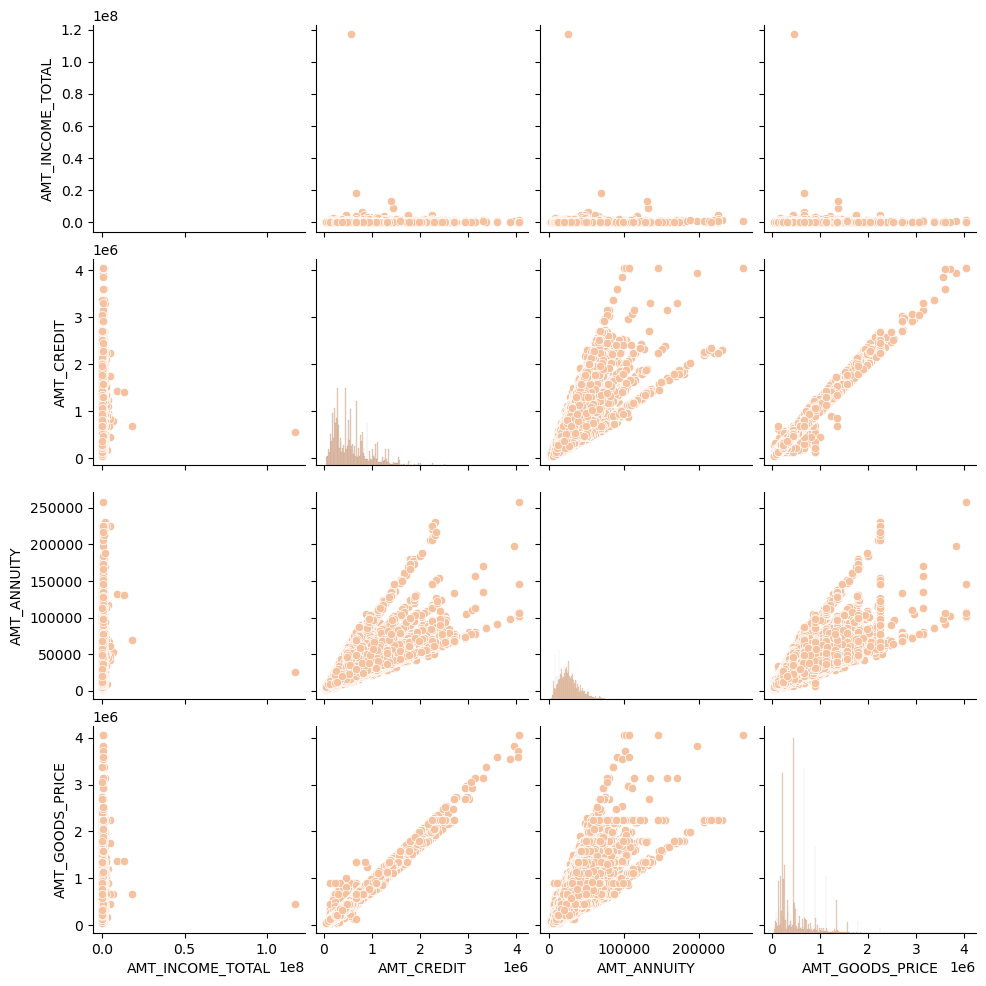

In [945]:
# creating a pairplot between the numerical variable for the data inp1

sns.pairplot(inp1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE']],palette="Set2")
plt.show()

**Insights:**
    
1.  **When the amount of goods price increases the credit amount also increases.**
2.  **Lowe income range has taken most of range of loan annuity.**

In [741]:
# Numeric Categorical analysis

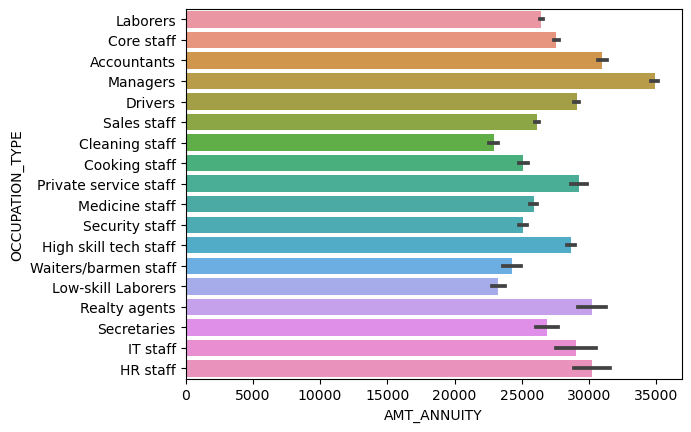

In [742]:
# creating a barplot between the AMT_ANNUITY v/s OCCUPATION_TYPE for data inp1

sns.barplot(data=inp1, x="AMT_ANNUITY", y="OCCUPATION_TYPE",orient='h');

**Insight:**

**Managers pay more loan annuity followed by accountants and Realty agents and least is paid by cleaning staff.**

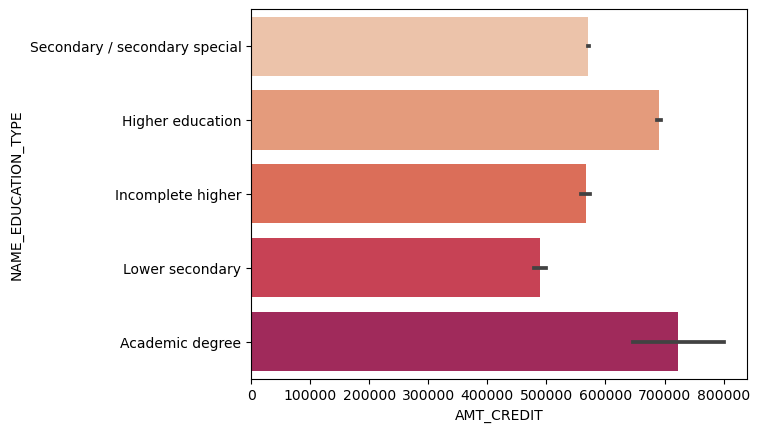

In [743]:
# creating a barplot between the AMT_CREDIT v/s NAME_EDUCATION_TYPE for data inp1

sns.barplot(data=inp1, x="AMT_CREDIT", y="NAME_EDUCATION_TYPE",orient='h');

**Insight:**

**More credit amount is taken by Academic degree holders and less by lower secondary educated clients**

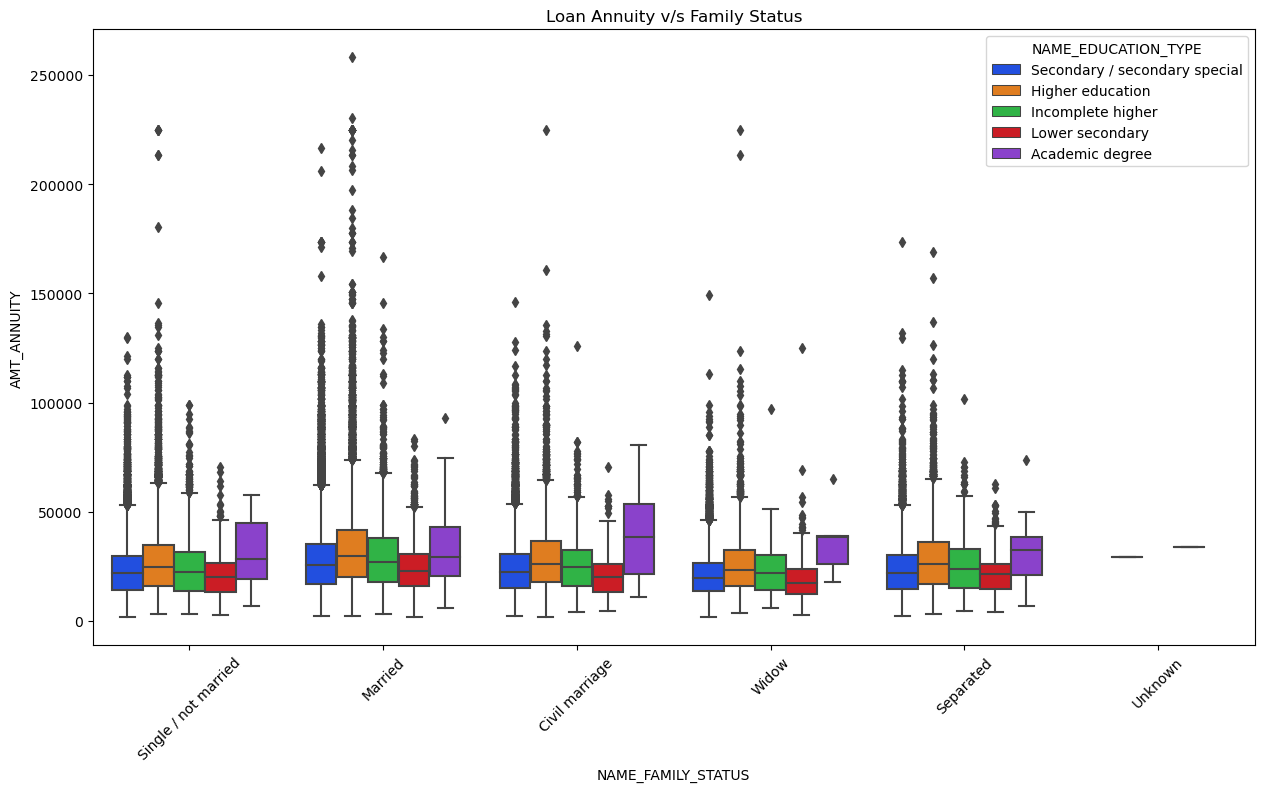

In [1034]:
##Analysis for numerical and categorical variables

plt.figure(figsize=(15,8))

sns.boxplot(data= inp1,x="NAME_FAMILY_STATUS",y="AMT_ANNUITY",hue="NAME_EDUCATION_TYPE",palette="bright",orient='v')
plt.title('Loan Annuity v/s Family Status')
plt.xticks(rotation=45)
plt.show()


**Insights**

- **There are more outliers in Married people of all education type,except Academic degree indicating that a wide range loan annuity had been taken by this group.**
- **In all the family status groups,the Academic degree holders have higher minimum loan annuity and least by secondary/special secondary educated group.**


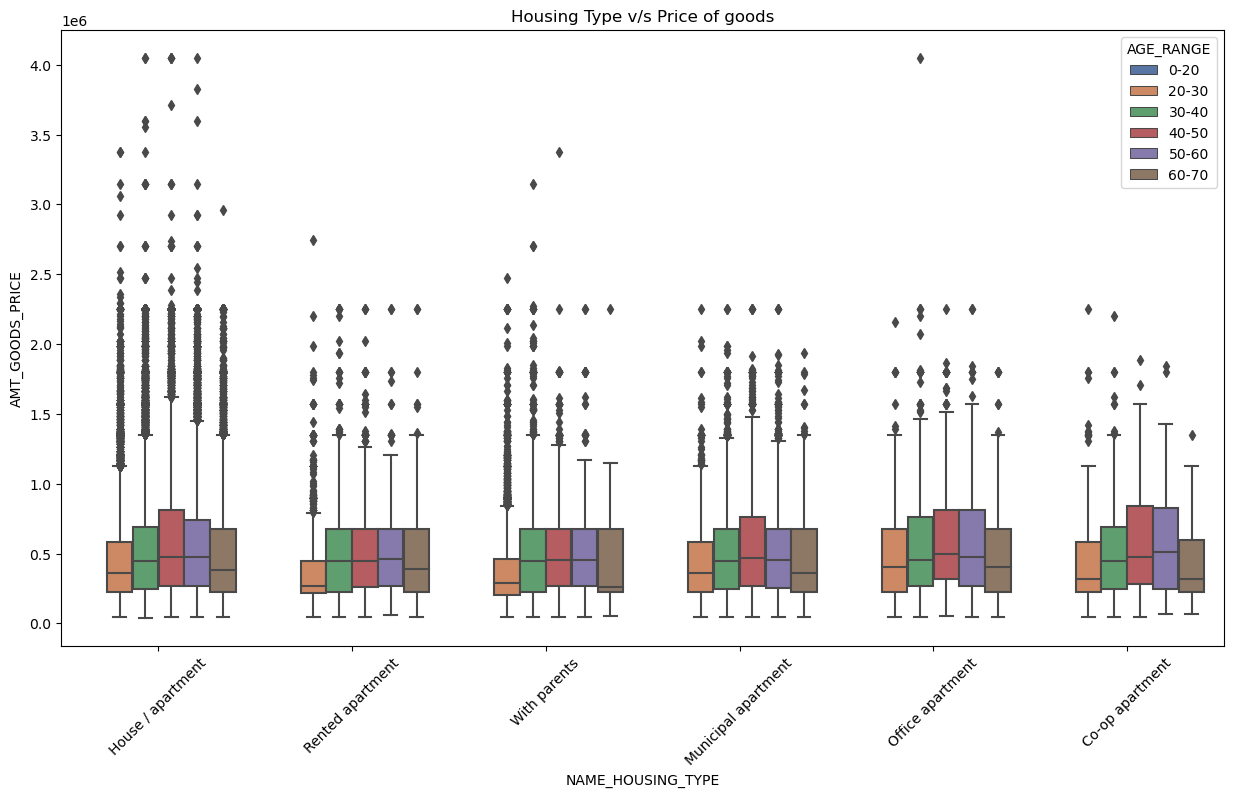

In [753]:
##Analysis  for numerical and categorical variables for data inp1
plt.figure(figsize=(15,8))

sns.boxplot(data= inp1,x="NAME_HOUSING_TYPE",y="AMT_GOODS_PRICE",hue="AGE_RANGE",palette="deep",orient='v')
plt.title('Housing Type v/s Price of goods')
plt.xticks(rotation=45)
plt.show()


**Insights**

- **1. Those living house/apartment of almost all age group have more outliers for  consumer loans as these people buy more things to their houses they own.**
- **2. Those living in co apartment and office apartment , have higher upper range for the consumer loans.**
- **3. The age group (20-30), living rented apartment and with parents have asked for lower consumer loans.**
- **4. The age group (40-50), living in house/apartment have shown to take higher consumer loans.**

# Analysis of Previous Application Data:

In [754]:
#read the previous_application data as inp0

inp0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.290,267295.5,311400.0,0.0,267295.5,WEDNESDAY,12,Y,1,0.000000,NaN,NaN,XAP,Approved,-544,Cash through the bank,XAP,NaN,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,365243.0,-508.0,362.0,-358.0,-351.0,0.0
1670210,2357031,334635,Consumer loans,6622.020,87750.0,64291.5,29250.0,87750.0,TUESDAY,15,Y,1,0.340554,NaN,NaN,XAP,Approved,-1694,Cash through the bank,XAP,Unaccompanied,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,365243.0,-1604.0,-1274.0,-1304.0,-1297.0,0.0
1670211,2659632,249544,Consumer loans,11520.855,105237.0,102523.5,10525.5,105237.0,MONDAY,12,Y,1,0.101401,NaN,NaN,XAP,Approved,-1488,Cash through the bank,XAP,"Spouse, partner",Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-1457.0,-1187.0,-1187.0,-1181.0,0.0
1670212,2785582,400317,Cash loans,18821.520,180000.0,191880.0,NaN,180000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-1185,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-1155.0,-825.0,-825.0,-817.0,1.0


In [757]:
# find the number of rows and columns in inp0

inp0.shape

(1670214, 37)

### cleaning the dataframe inp0

In [765]:
#list the columns with null values more than 30% missing values:

In [766]:
# Dropping the columns with higher percentage of missing values 
empty_column=(100*inp0.isnull().sum()/inp0.shape[0]).sort_values(ascending=False).reset_index().rename(columns={"index":"column_name",0:"% missing"})

In [772]:
empty_column

,column_name,% missing
0,RATE_INTEREST_PRIVILEGED,99.643698
1,RATE_INTEREST_PRIMARY,99.643698
2,AMT_DOWN_PAYMENT,53.636480
3,RATE_DOWN_PAYMENT,53.636480
4,NAME_TYPE_SUITE,49.119754
5,NFLAG_INSURED_ON_APPROVAL,40.298129
6,DAYS_TERMINATION,40.298129
7,DAYS_LAST_DUE,40.298129
8,DAYS_LAST_DUE_1ST_VERSION,40.298129
9,DAYS_FIRST_DUE,40.298129


In [768]:
#columns with missing value percentage 30  above are dropped

column_drop=list(empty_column[empty_column["% missing"]>=40]["column_name"])

In [769]:
inp0.drop(column_drop,axis=1,inplace=True)

In [770]:
inp0.shape

(1670214, 26)

In [771]:
inp0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [773]:
inp0.columns.tolist()

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'DAYS_DECISION',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'SELLERPLACE_AREA',
 'NAME_SELLER_INDUSTRY',
 'CNT_PAYMENT',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [774]:
# dropping the unnecessary columns:

unnecessary=['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
inp0.drop(unnecessary,axis=1,inplace=True)

In [775]:
inp0.shape

(1670214, 22)

In [781]:
#convert the negative days to positive days

inp0['DAYS_DECISION']=abs(inp0['DAYS_DECISION'])

#### **There could be duplicate 'SK_ID_CURR' as a person could have taken loan multiple times**

In [784]:
# Number of unique id in previous application
inp0.SK_ID_PREV.value_counts()

2030495    1
1035848    1
1526498    1
2148893    1
2437429    1
          ..
2811649    1
1221292    1
2780117    1
2194001    1
2418762    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64

In [786]:
# Number of unique id in previous application
inp0.SK_ID_CURR.value_counts()

187868    77
265681    73
173680    72
242412    68
206783    67
          ..
135285     1
311960     1
427136     1
241434     1
191629     1
Name: SK_ID_CURR, Length: 338857, dtype: int64

**We can see from above, the shape of previous application is (1670214, 37) and length of SK_ID_PREV is also (1670214), but length of SK_ID_CURR is (338857), which is less than length of SK_ID_PREV, which tells us that there are duplicate number of SK_ID_PREV**

### Merging of dataframes inp1 and inp0 based on SK_ID_CURR

In [971]:
#creating a data frame from inp1 with the columns 'SK_ID_CURR'and'TARGET' for the analysis of loan attributes on dafaulters

in_group=inp1[['SK_ID_CURR','TARGET','AGE_RANGE','CODE_GENDER','AMT_INCOME_TOTAL','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_INCOME_TYPE','ORGANIZATION_TYPE']]

In [972]:
inp1.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_

In [973]:
in_group.shape

(307511, 10)

In [974]:
datas_merged=pd.merge(in_group,inp0,on='SK_ID_CURR',how="inner")

In [975]:
datas_merged.head()

,SK_ID_CURR,TARGET,AGE_RANGE,CODE_GENDER,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,ORGANIZATION_TYPE,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,20-30,M,202500.0,Secondary / secondary special,Single / not married,House / apartment,Working,Business Entity Type 3,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,XAP,Approved,606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,40-50,F,270000.0,Higher education,Married,House / apartment,State servant,School,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,XNA,Approved,746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,40-50,F,270000.0,Higher education,Married,House / apartment,State servant,School,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,XAP,Approved,828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,40-50,F,270000.0,Higher education,Married,House / apartment,State servant,School,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,XAP,Approved,2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,50-60,M,67500.0,Secondary / secondary special,Single / not married,House / apartment,Working,Government,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,XAP,Approved,815,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30,Connectivity,4.0,middle,POS mobile without interest


In [976]:
#dropping the column 'NAME_CASH_LOAN_PURPOSE' 

column_to_drop=['NAME_CASH_LOAN_PURPOSE']
datas_merged.drop(column_to_drop,axis=1,inplace=True)

In [977]:
datas_merged.shape

(1413701, 30)

In [978]:
datas_merged.info(-1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 30 columns):
 #   Column                Non-Null Count    Dtype   
---  ------                --------------    -----   
 0   SK_ID_CURR            1413701 non-null  int64   
 1   TARGET                1413701 non-null  int64   
 2   AGE_RANGE             1413701 non-null  category
 3   CODE_GENDER           1413701 non-null  object  
 4   AMT_INCOME_TOTAL      1413701 non-null  float64 
 5   NAME_EDUCATION_TYPE   1413701 non-null  object  
 6   NAME_FAMILY_STATUS    1413701 non-null  object  
 7   NAME_HOUSING_TYPE     1413701 non-null  object  
 8   NAME_INCOME_TYPE      1413701 non-null  object  
 9   ORGANIZATION_TYPE     1413701 non-null  object  
 10  SK_ID_PREV            1413701 non-null  int64   
 11  NAME_CONTRACT_TYPE    1413701 non-null  object  
 12  AMT_ANNUITY           1106483 non-null  float64 
 13  AMT_APPLICATION       1413701 non-null  float64 
 14  AMT_CREDIT        

In [979]:
category_0 = list(datas_merged.select_dtypes(include=['object']).columns)
category_0

['CODE_GENDER',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'NAME_INCOME_TYPE',
 'ORGANIZATION_TYPE',
 'NAME_CONTRACT_TYPE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

### Univariate Analysis: 

In [980]:
# create a dataframe dt_0 (no difficulty) and dt_1(defaulters) for segmented univariate analysis on loan attributes

dt_0=datas_merged[datas_merged["TARGET"]==0]
dt_1=datas_merged[datas_merged["TARGET"]==1]

draw  CODE_GENDER


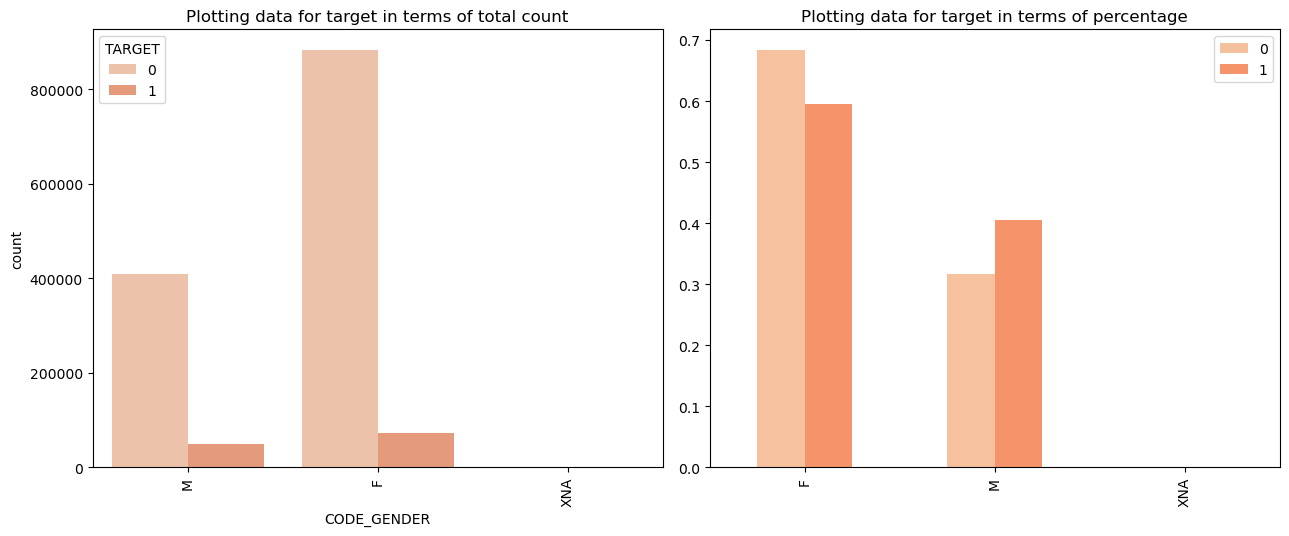

*************************************************************************************************
draw  NAME_EDUCATION_TYPE


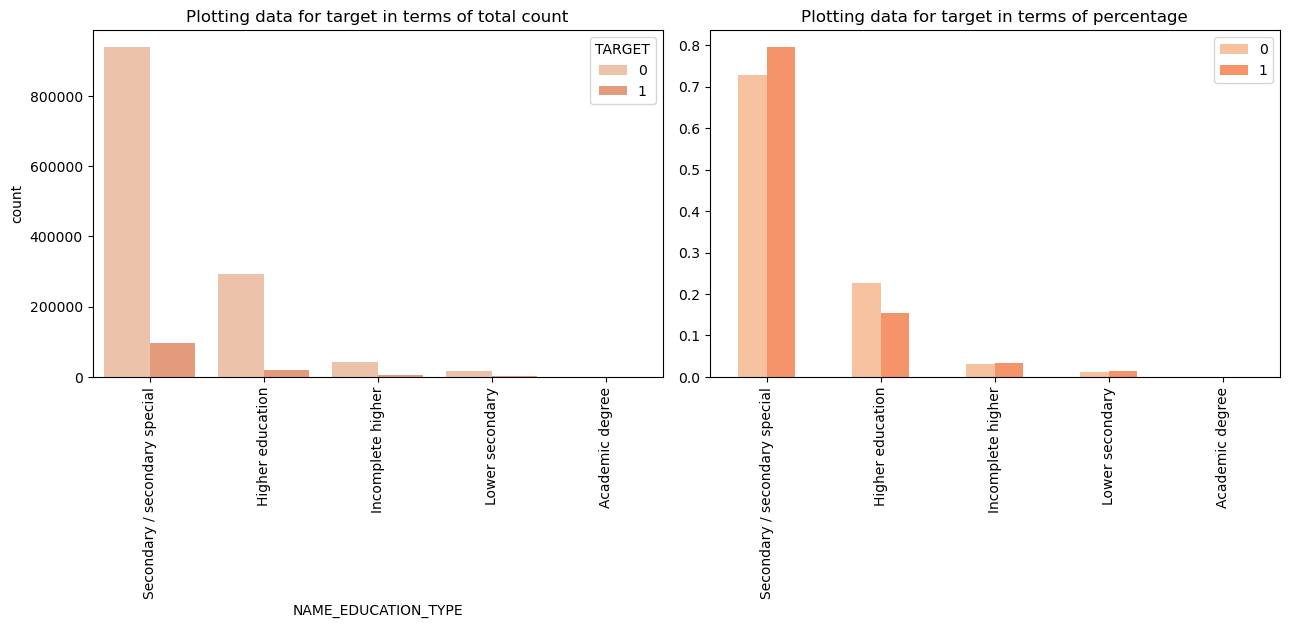

*************************************************************************************************
draw  NAME_FAMILY_STATUS


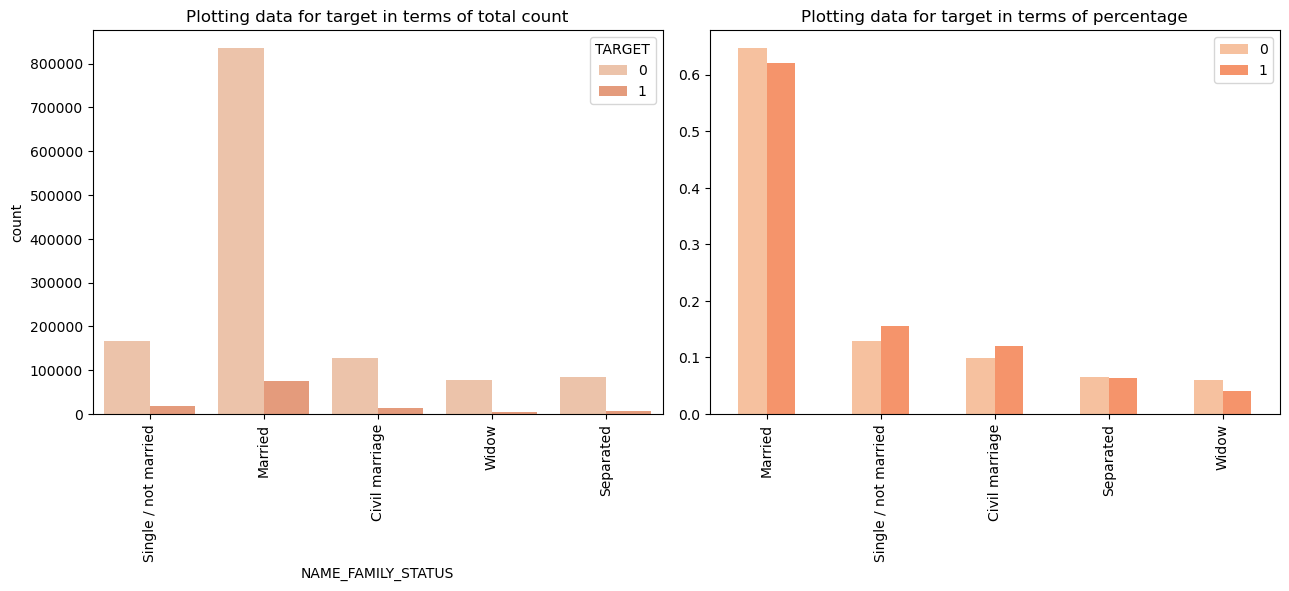

*************************************************************************************************
draw  NAME_HOUSING_TYPE


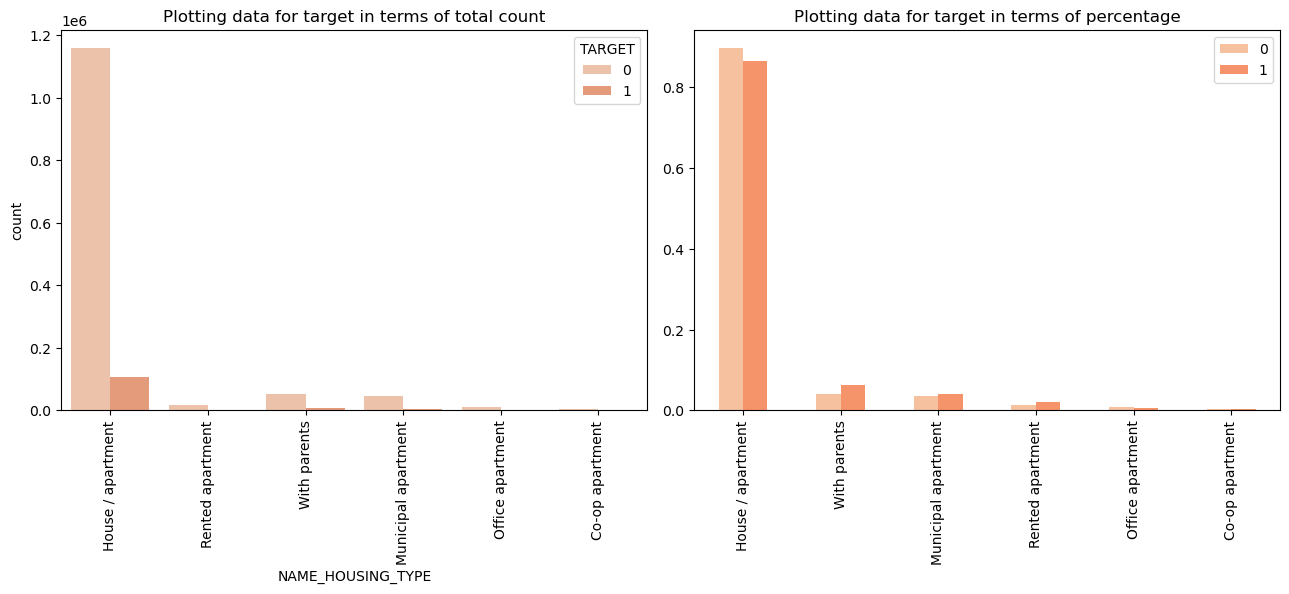

*************************************************************************************************
draw  NAME_INCOME_TYPE


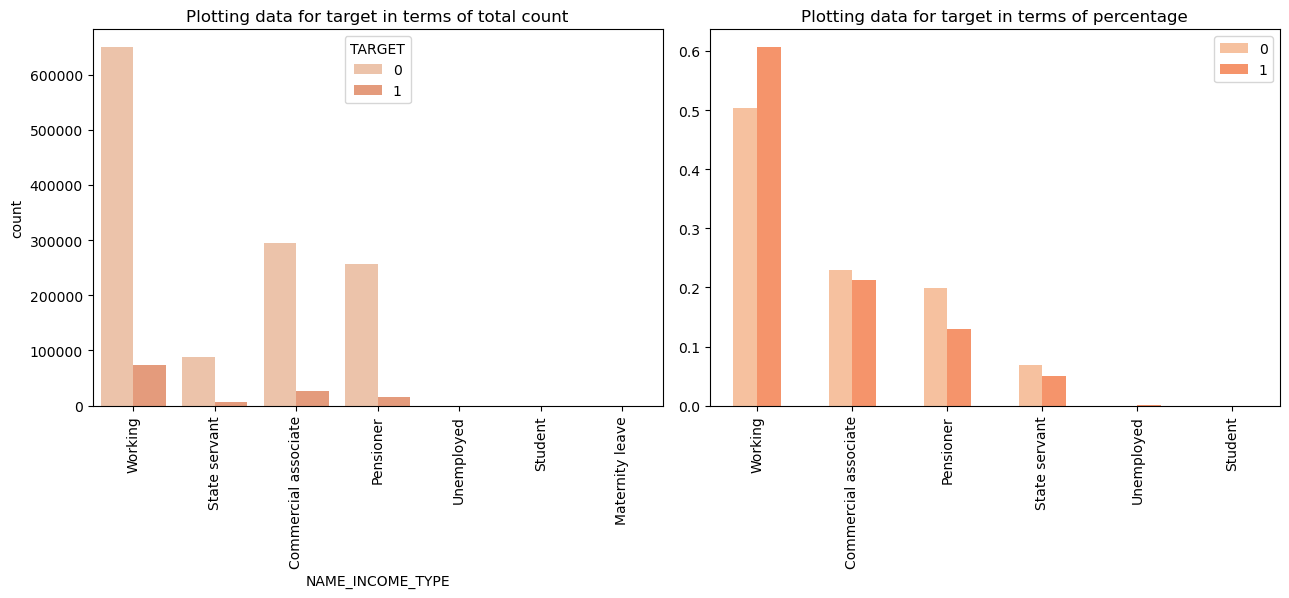

*************************************************************************************************
draw  ORGANIZATION_TYPE


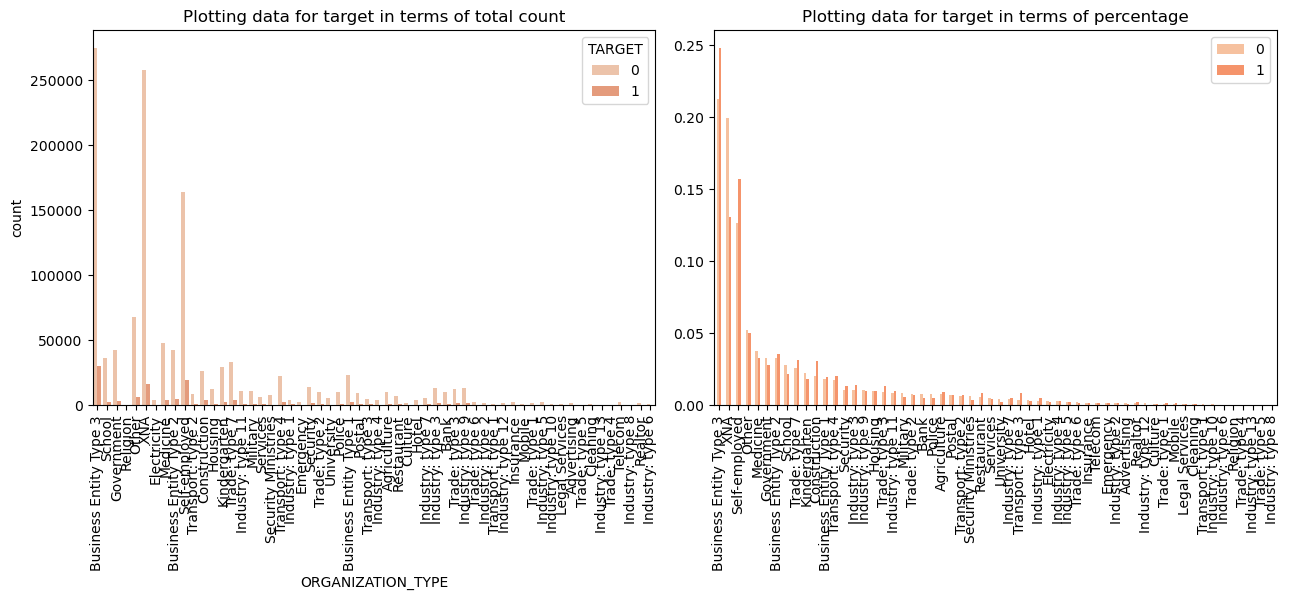

*************************************************************************************************
draw  NAME_CONTRACT_TYPE


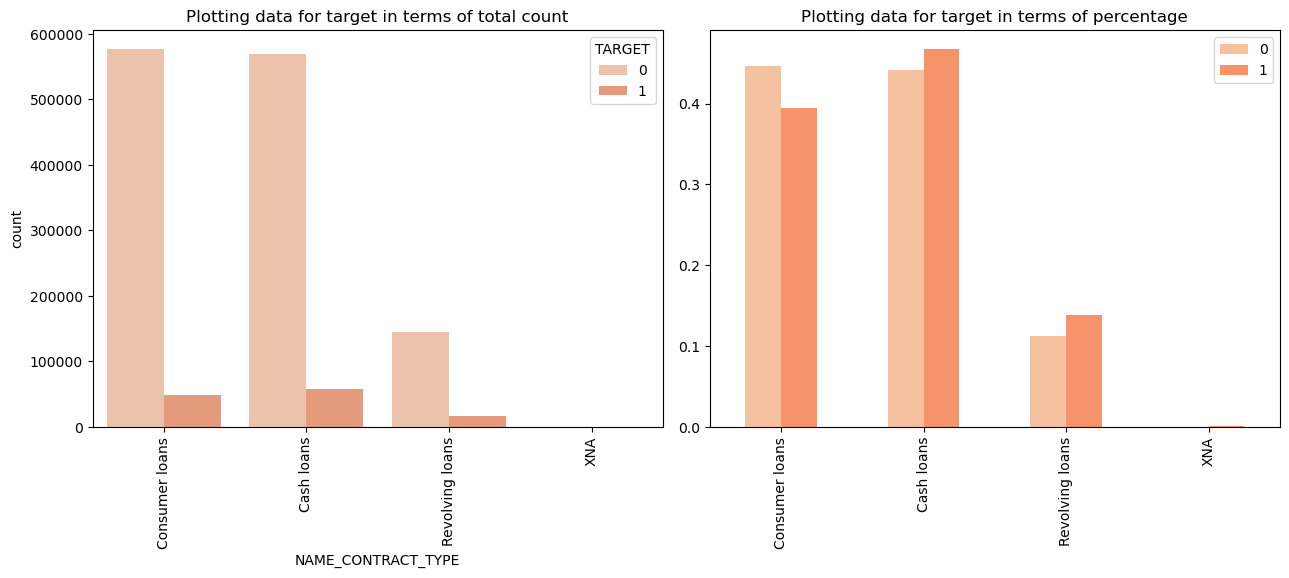

*************************************************************************************************
draw  NAME_CONTRACT_STATUS


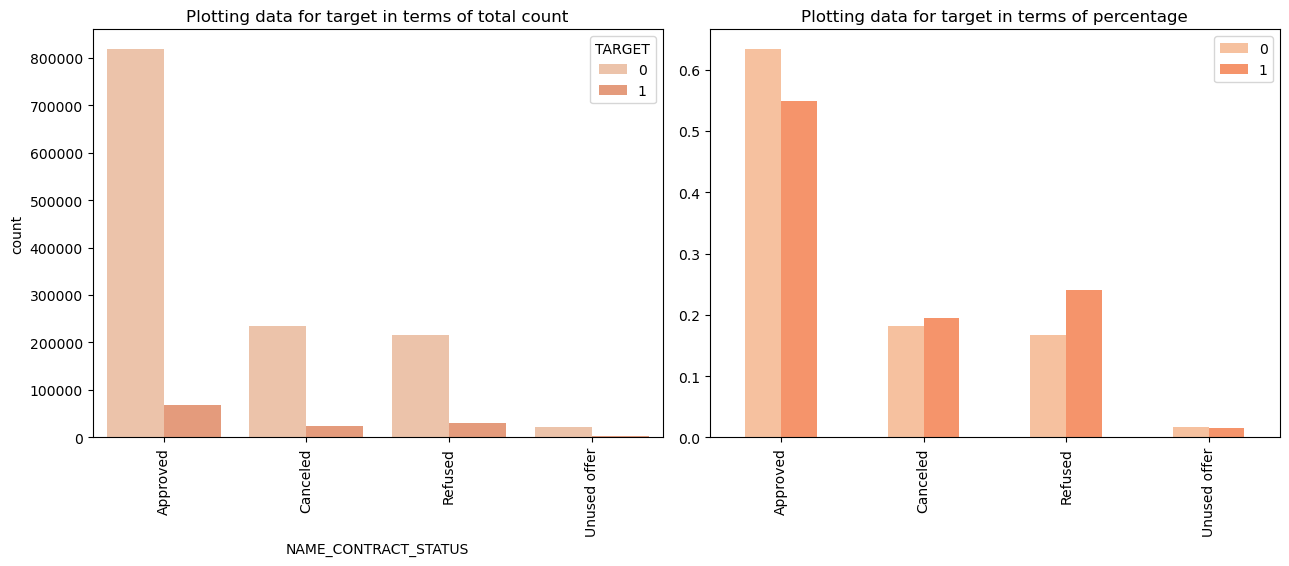

*************************************************************************************************
draw  NAME_PAYMENT_TYPE


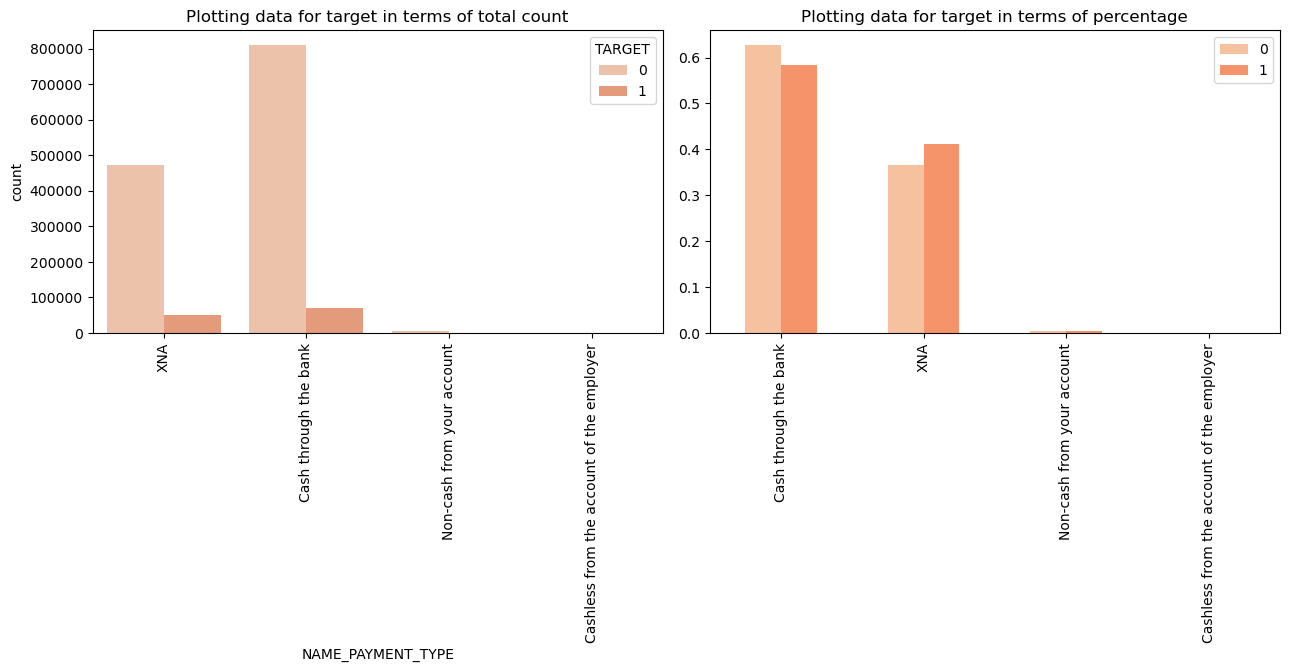

*************************************************************************************************
draw  CODE_REJECT_REASON


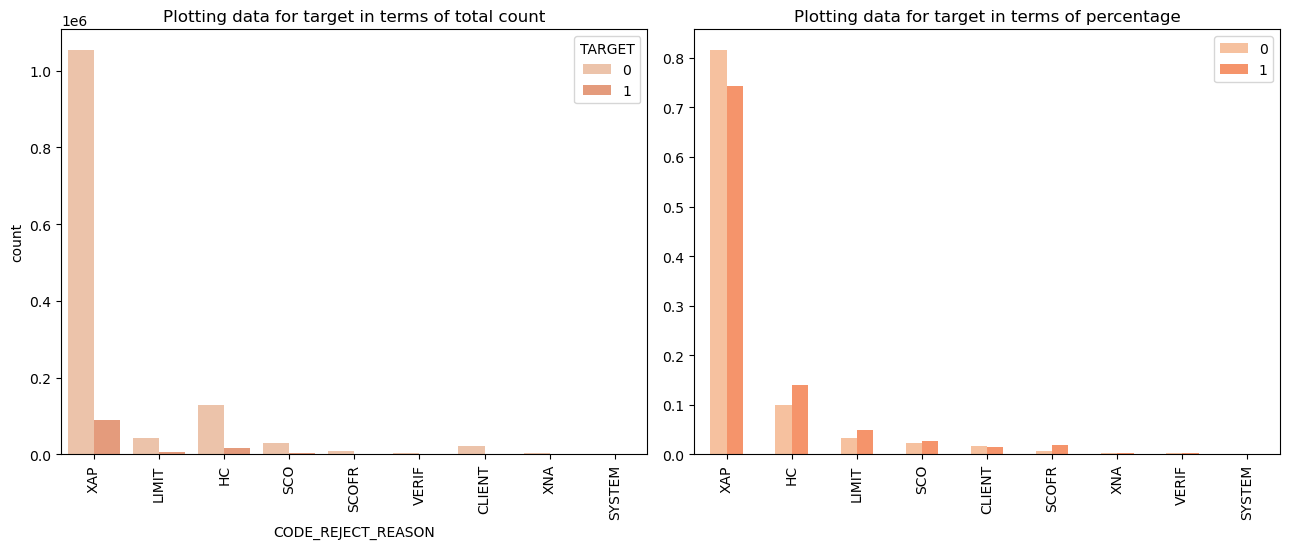

*************************************************************************************************
draw  NAME_CLIENT_TYPE


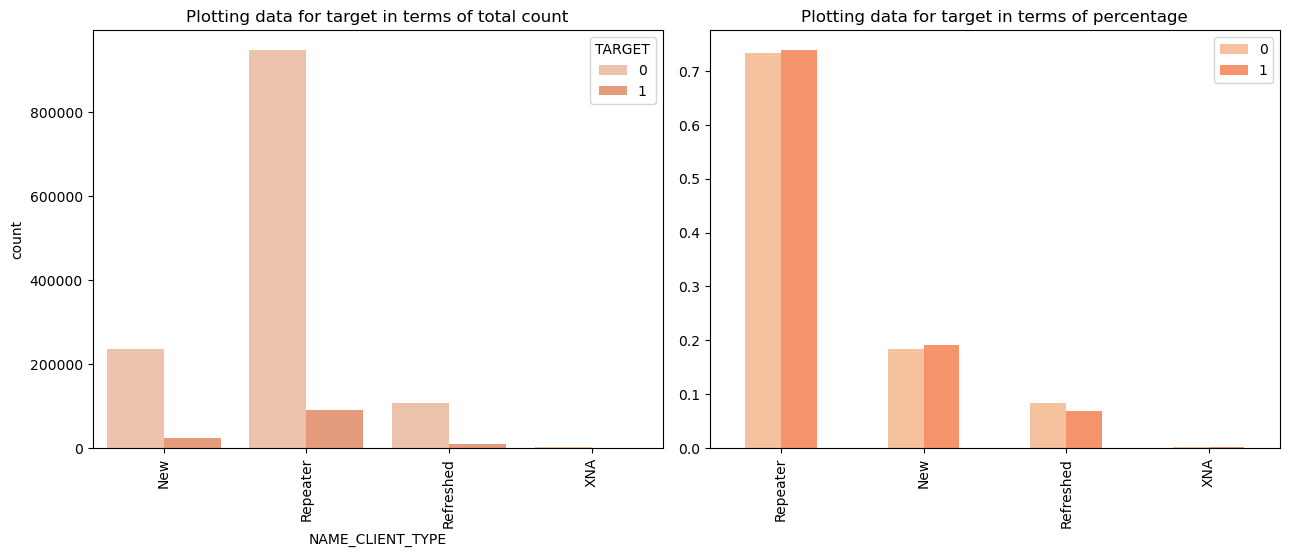

*************************************************************************************************
draw  NAME_GOODS_CATEGORY


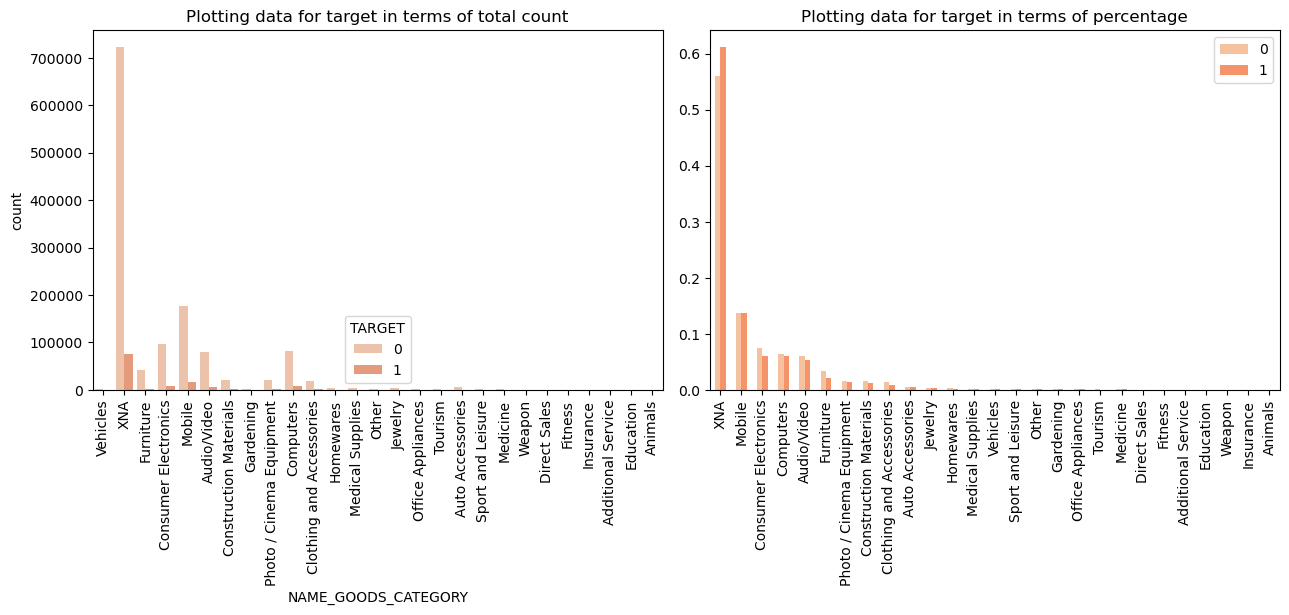

*************************************************************************************************
draw  NAME_PORTFOLIO


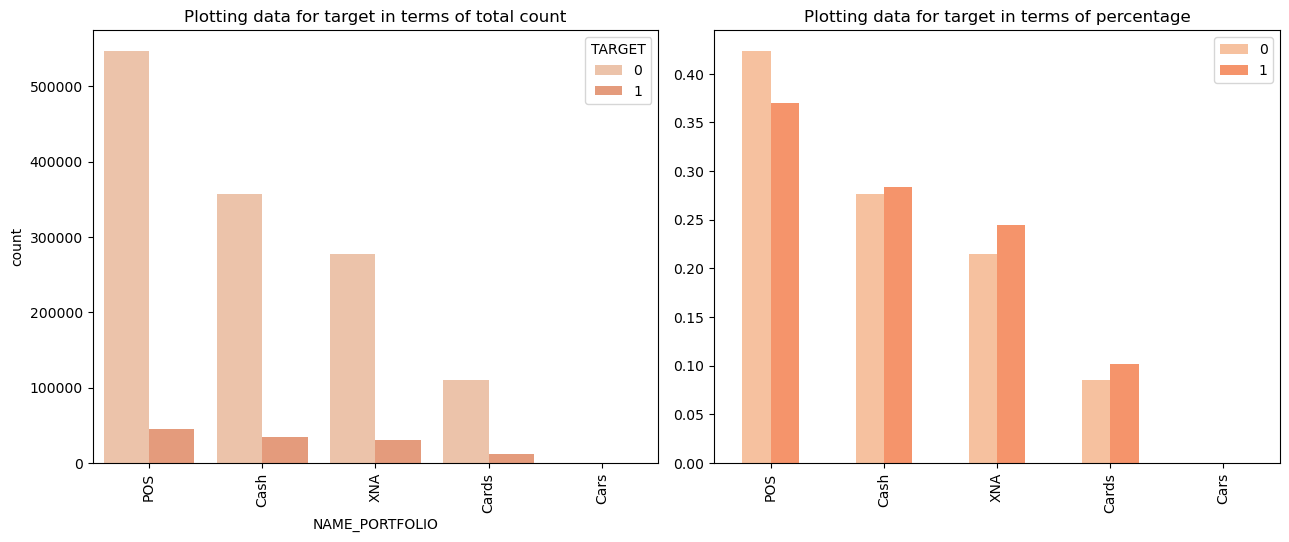

*************************************************************************************************
draw  NAME_PRODUCT_TYPE


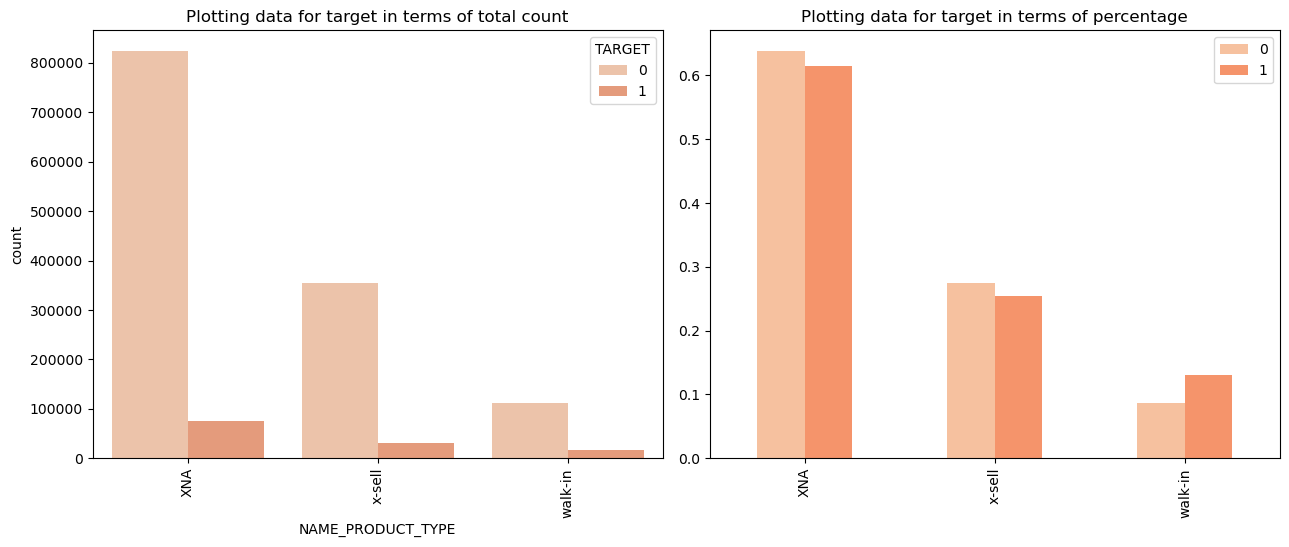

*************************************************************************************************
draw  CHANNEL_TYPE


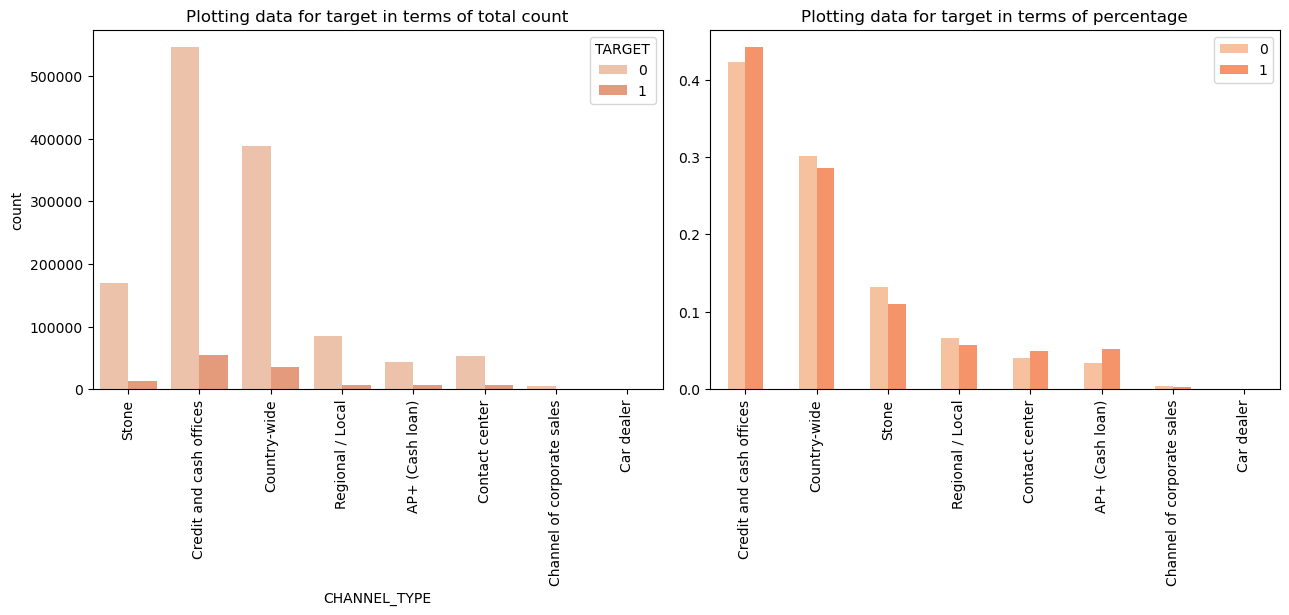

*************************************************************************************************
draw  NAME_SELLER_INDUSTRY


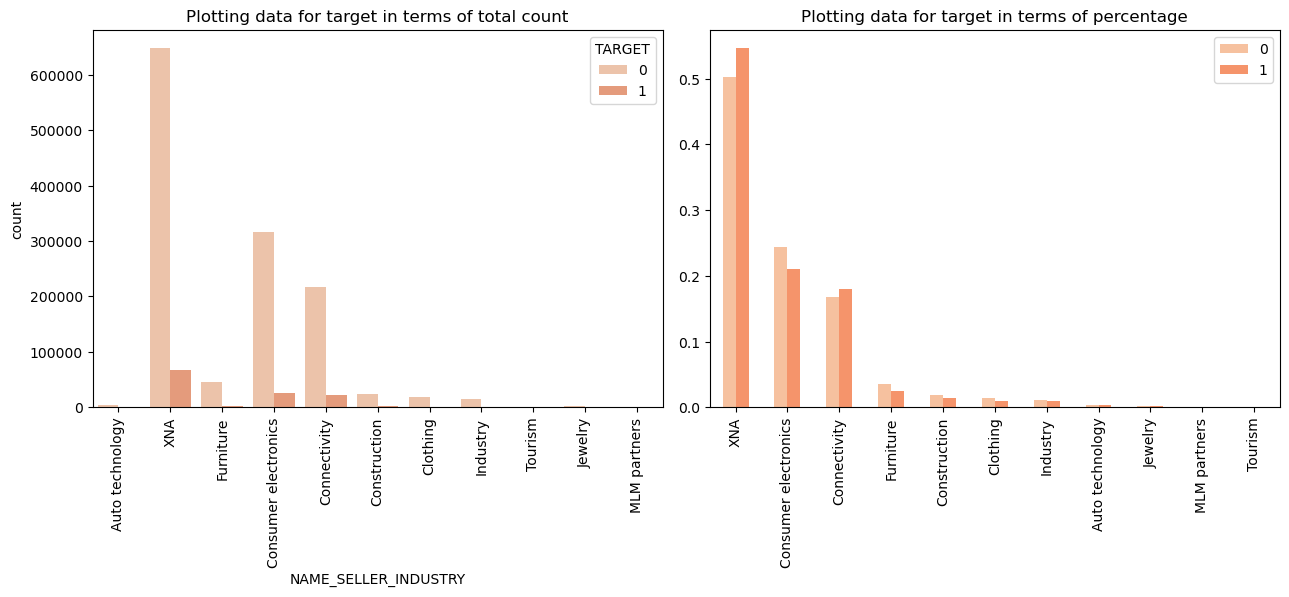

*************************************************************************************************
draw  NAME_YIELD_GROUP


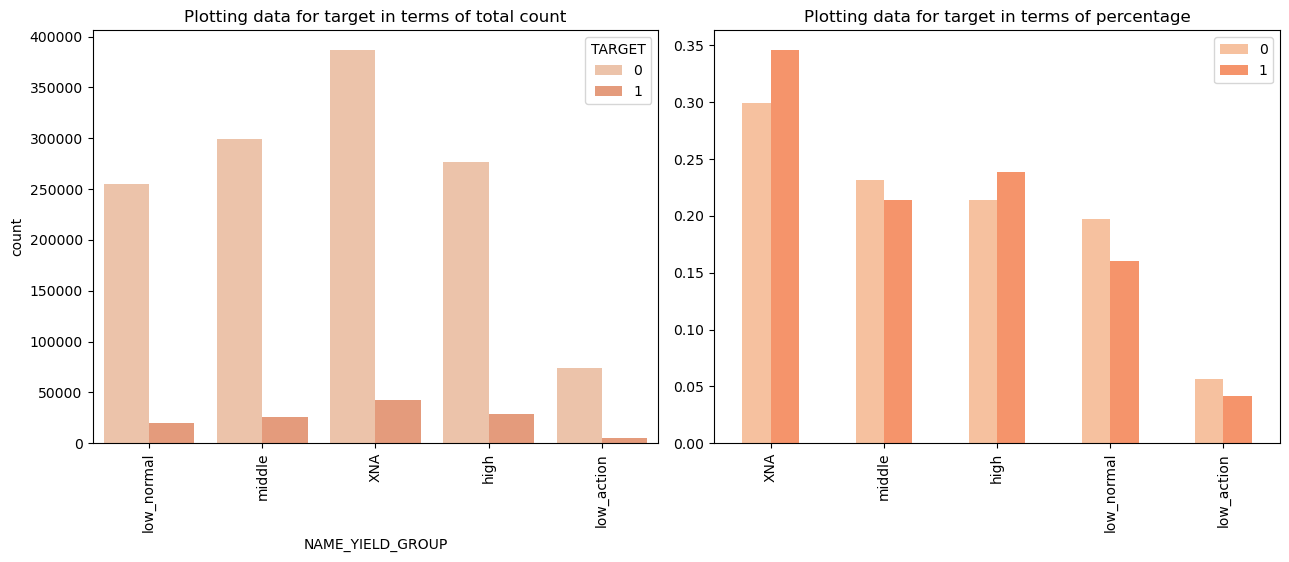

*************************************************************************************************
draw  PRODUCT_COMBINATION


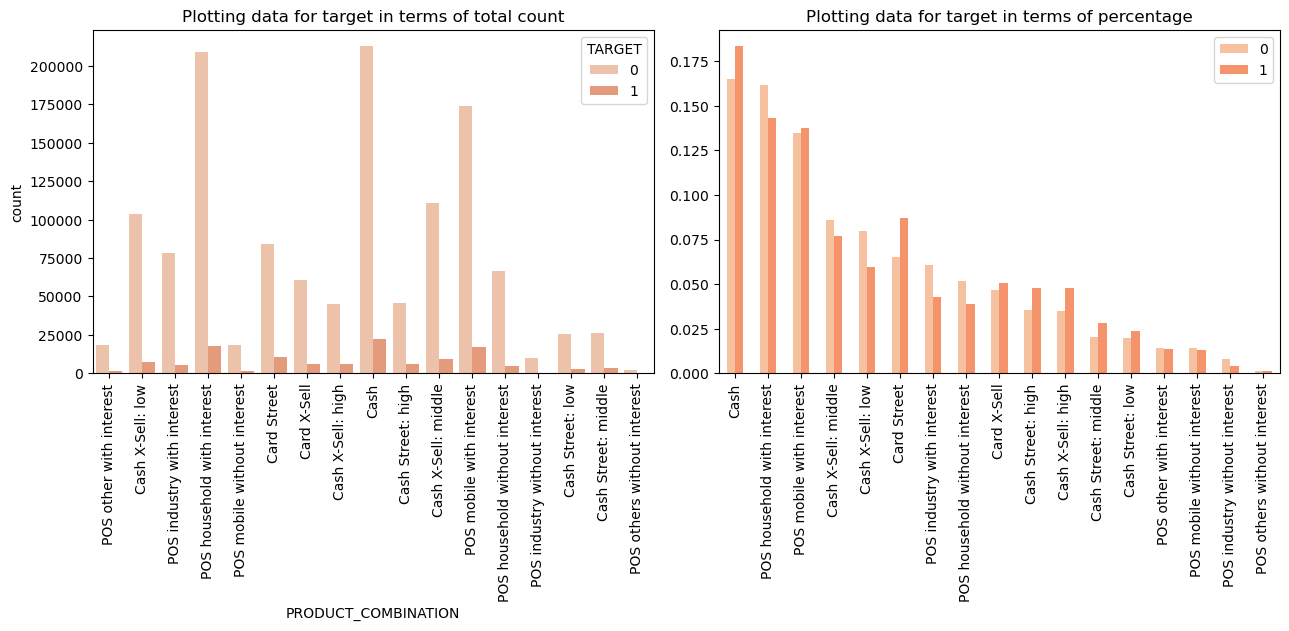

*************************************************************************************************


In [981]:
for column in category_0:
    print("draw ", column)
    draw(datas_merged, dt_0, dt_1, column)
    print('*************************************************************************************************')

**Insights:**

- 1. Consumer loans have less defaulters compared to cash loans and revolving loans.
- 2. Repeater tend to default more compared to Refreshed.This could be because re-checking the client's credit score, employment status, income, and other relevant financial information to ensure that the client still meets the bank's lending criteria.
- 3. Mobile phones in goods category have show same tendency for both defaulters and non defaulters.
- 4. More people have taken consumer loans for vehicles.
- 5. More people preferred to use bank as the payment type.
- 6. The seller industry for connectivity shown a trend of more defaulters.
- 7. High yeilding group have shown more defaulters.

### Bivariate Analysis :

In [982]:
##Analysis for categorical variables

def mark(column, hue):
    col = column
    hue = hue
    fig = plt.figure(figsize=(13,13))

    ax1 = plt.subplot(221)
    d_f = pd.DataFrame()
    d_f['0']= ((dt_0[col].value_counts())/len(dt_0))
    d_f['1']= ((dt_1[col].value_counts())/len(dt_1))
    d_f.plot.bar(ax=ax1)
    plt.title('Plotting data for target in terms of total count')

    ax2 = plt.subplot(222)
    sns.countplot(x=col, hue=hue, data=dt_0, ax = ax2,palette="bright")
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=0 in terms of percentage')

    ax3 = plt.subplot(223)
    sns.countplot(x=col, hue=hue, data=dt_1, ax = ax3,palette="bright")
    plt.xticks(rotation=90)
    plt.title('Plotting data for Target=1 in terms of percentage')

    fig.tight_layout() # Or equivalently,  "plt.tight_layout()"

    plt.show()

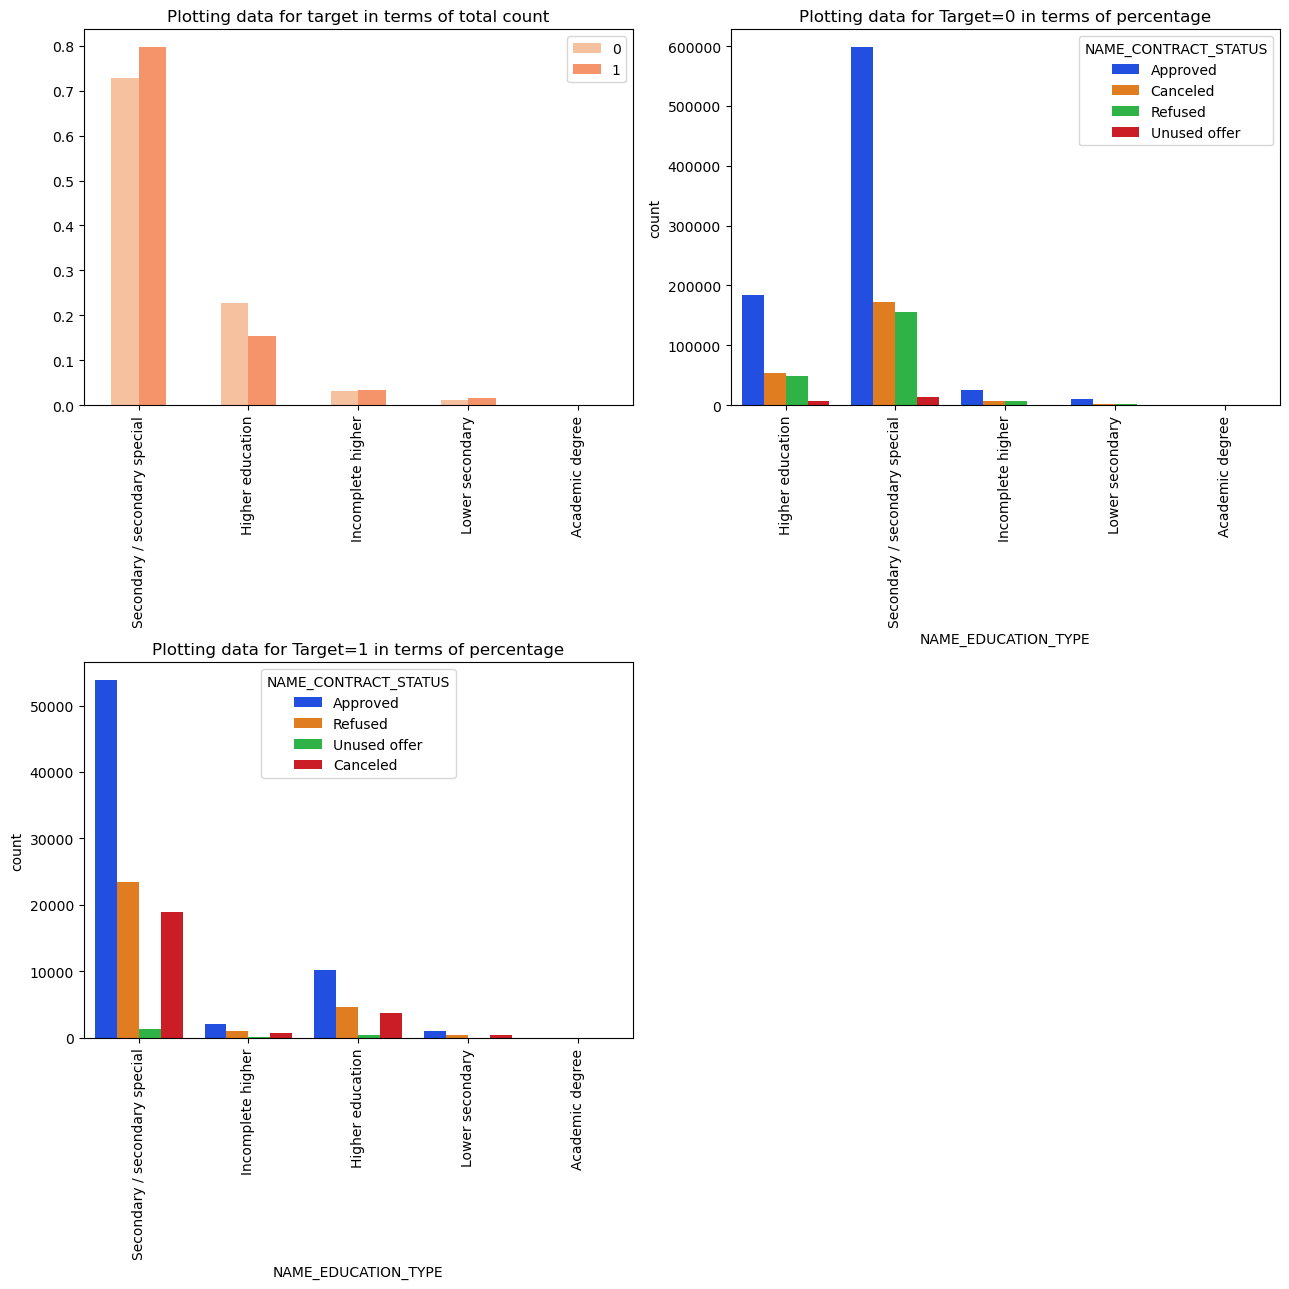

In [983]:
mark('NAME_EDUCATION_TYPE','NAME_CONTRACT_STATUS')  

**Insight**

**In all the cases of both defaulters and non defaulters,secondary/secondary special educated people applied for more loan compared to all other groups.**

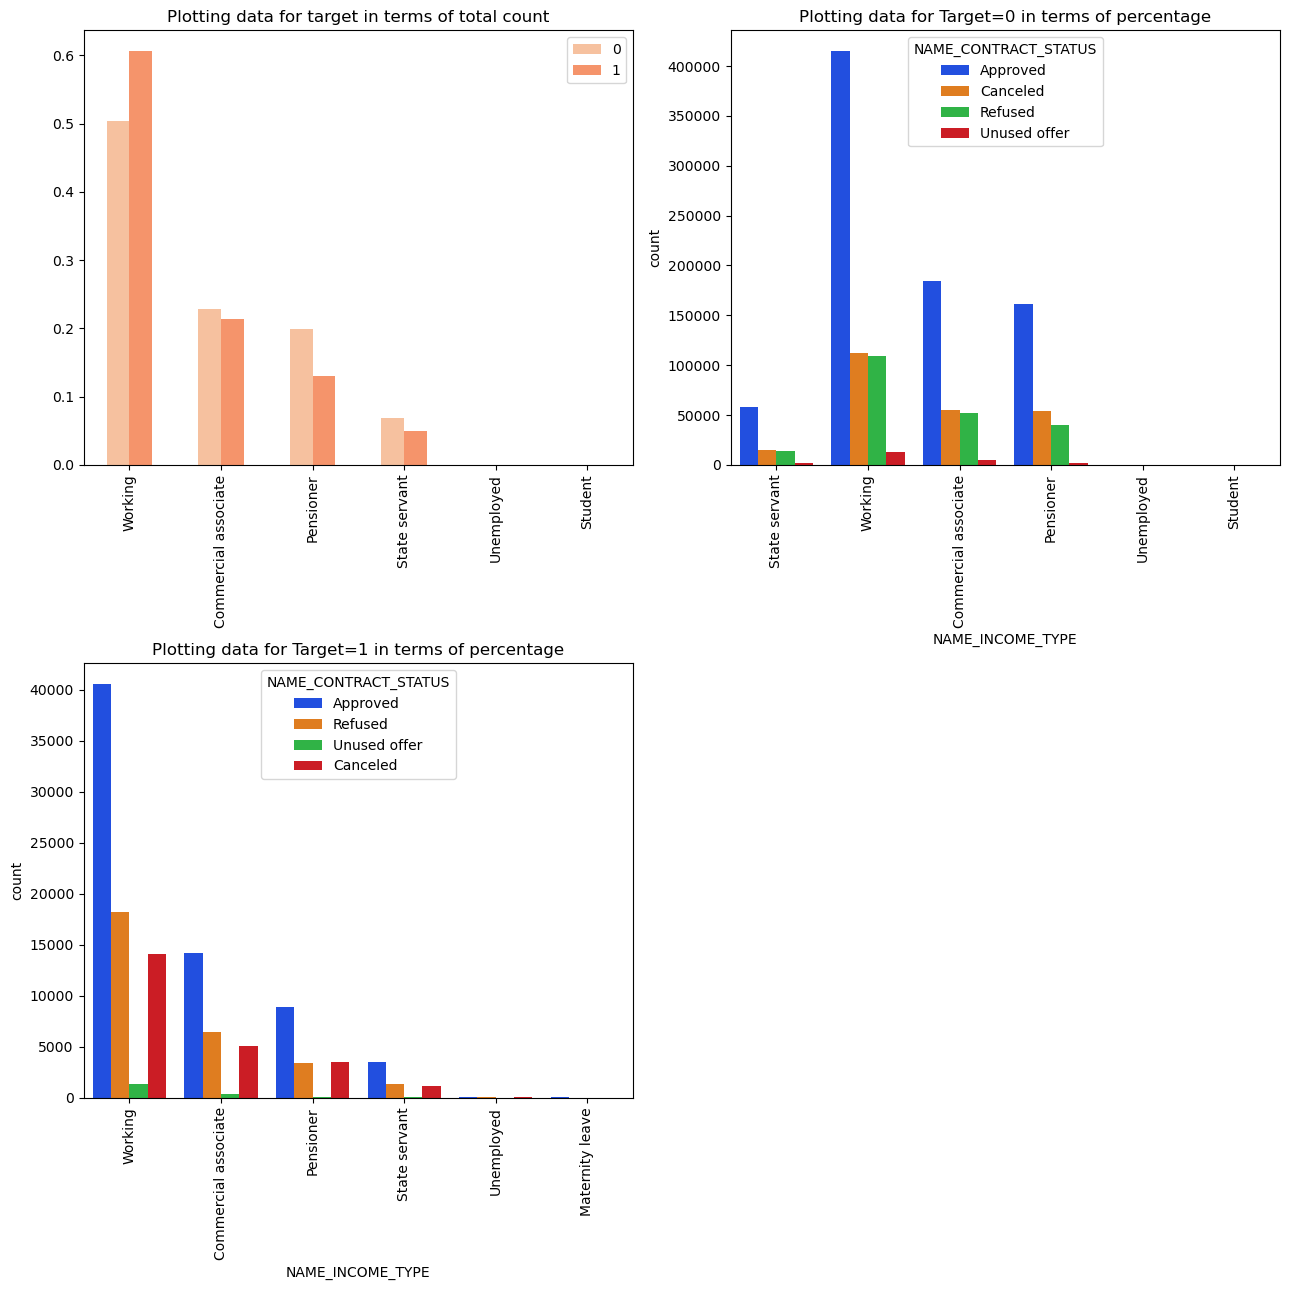

In [989]:
mark('NAME_INCOME_TYPE','NAME_CONTRACT_STATUS') 

**Insight**

**In all the cases of both defaulters and non defaulters,working people applied for more loan compared to all other groups.**

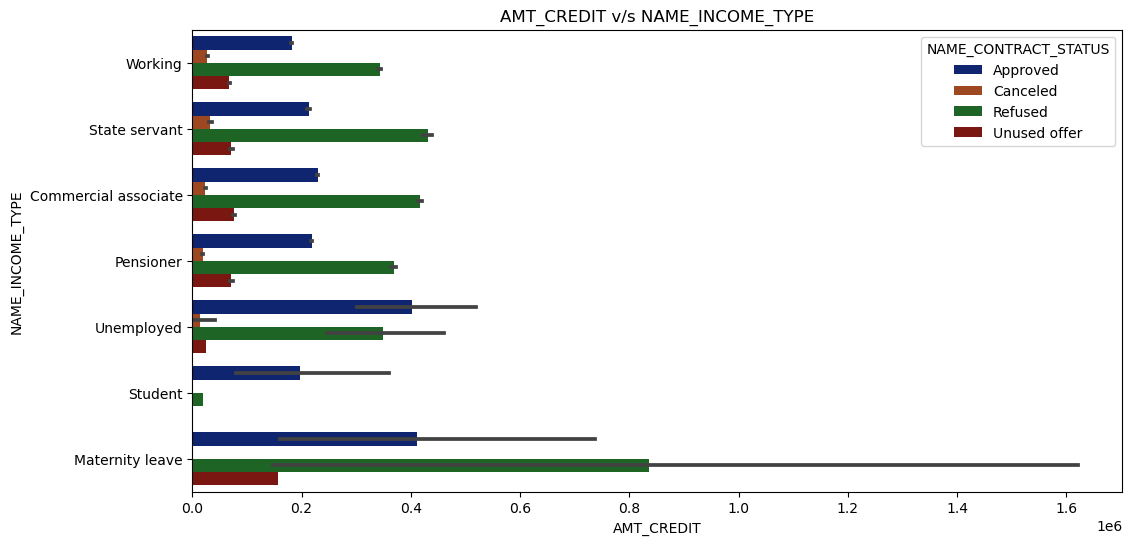

In [1039]:
## Analysis for numerical variables
# creating a barplot between the AMT_CREDIT v/s NAME_INCOME_TYPE 


plt.figure(figsize=(12,6))
sns_plot=sns.barplot(data=datas_merged, x="AMT_CREDIT", y="NAME_INCOME_TYPE",orient='h',hue='NAME_CONTRACT_STATUS',palette="dark")
legend = ax.get_legend()
plt.title("AMT_CREDIT v/s NAME_INCOME_TYPE")

plt.show()

**Insight**

- 1. More refusal of loan application had come for those who are in maternity leave.
- 2. More credit amount have been taken by Unemployed compared to working class.

***THANK YOU***